In [1]:
print("Final Project Fighting!! ")

Final Project Fighting!! 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ad_list

In [3]:
ad_list = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/IVE_광고목록.csv")
ad_list.head()

/var/folders/4n/w27drm2j3_v05ss9qbg_6qsc0000gn/T/ipykernel_76221/302293741.py:1: DtypeWarning: Columns (12,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ad_list = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/IVE_광고목록.csv")


,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
0,160,tr71opm6C1,6,10,13604,1,1,리니지레드나이츠,"리니지레드나이츠,com.ncsoft.redknights,ecaab3f9d2616f6...",https://lh3.googleusercontent.com/oDGXxngO9oOP...,...,0,100,2,170,150,982800,NONE,Y,2017-04-06 13:19:53,N
1,284,xlNpfkgtLX,6,10,13605,1,1,강철의함대:Ocean Overlord,"강철의함대:Ocean Overlord,com.gamepub.lw.g,a370ab70...",http://nextapps-nas.aws.appang.kr/icon/2016122...,...,0,100,2,180,160,987200,NONE,Y,2017-01-10 10:37:22,N
2,292,7Hj8V5QKiy,6,10,13606,1,1,스노우 SNOW,"스노우 SNOW,com.campmobile.snow,5b892d7e0cff73621...",http://nextapps-nas.aws.appang.kr/icon/2016092...,...,0,100,2,160,160,987300,NONE,Y,2017-01-02 12:51:34,N
3,304,1RfxHJcuEe,6,10,13607,2,1,서머너즈 워: 천공의 아레나,"서머너즈 워: 천공의 아레나,com.com2us.smon.normal.freeful...",http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,...,0,100,2,230,210,931000,NONE,Y,2017-03-30 17:05:23,N
4,306,l3GyilYEVk,6,10,23543,1,1,하이마트,"하이마트,com.himart.main,8230c6a95581533fad10b0e3b...",http://nextapps-nas.aws.appang.kr/icon/2016032...,...,0,100,2,170,140,1155100,NONE,Y,2017-06-12 15:24:46,N


In [4]:
ad_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445260 entries, 0 to 445259
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ads_idx             445260 non-null  int64 
 1   ads_code            445260 non-null  object
 2   aff_idx             445260 non-null  int64 
 3   adv_idx             445260 non-null  int64 
 4   sch_idx             445260 non-null  int64 
 5   ads_type            445260 non-null  int64 
 6   ads_category        445260 non-null  int64 
 7   ads_name            445260 non-null  object
 8   ads_search          445258 non-null  object
 9   ads_icon_img        445255 non-null  object
 10  ads_summary         438199 non-null  object
 11  ads_guide           444957 non-null  object
 12  ads_limit           543 non-null     object
 13  ads_payment         2335 non-null    object
 14  ads_save_way        444746 non-null  object
 15  ads_day_cap         445260 non-null  object
 16  ad

In [53]:
pd.set_option('display.max_rows', 1000)
ad_list.loc[ad_list['delyn'] == 'Y', ['ads_type', 'ads_name', 'ads_sdate', 'ads_edate', 'regdate']]

NameError: name 'ad_list' is not defined

### NEW 리스트 만들기

In [5]:
new_ad_list = ad_list.drop(['sch_idx', 'ads_search', 'ads_guide', 'ads_limit', 'ads_payment', 'ads_package', 'ads_sex_type', 'ads_require_adid'], axis=1)
new_ad_list

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,delyn
0,160,tr71opm6C1,6,10,1,1,리니지레드나이츠,https://lh3.googleusercontent.com/oDGXxngO9oOP...,[앱설명]<br />[설치형] 매력만점 영웅들과 소환수들이 함께하는 취향저격 RPG...,받기,...,9999-12-31 23:59:59,0,100,2,170,150,982800,NONE,2017-04-06 13:19:53,N
1,284,xlNpfkgtLX,6,10,1,1,강철의함대:Ocean Overlord,http://nextapps-nas.aws.appang.kr/icon/2016122...,"[앱설명]<br />[설치형] 한, 중, 일 아시아 유저들과 함께 대규모 해상 전투...",받기,...,9999-12-31 23:59:59,0,100,2,180,160,987200,NONE,2017-01-10 10:37:22,N
2,292,7Hj8V5QKiy,6,10,1,1,스노우 SNOW,http://nextapps-nas.aws.appang.kr/icon/2016092...,"[앱설명]<br />[설치형] 셀카, 얼굴인식 스티커, 꿀잼 카메라<br /><br...",받기,...,9999-12-31 23:59:59,0,100,2,160,160,987300,NONE,2017-01-02 12:51:34,N
3,304,1RfxHJcuEe,6,10,2,1,서머너즈 워: 천공의 아레나,http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,[앱설명]<br />[실행형] 전 세계 5000만 소환사들을 사로잡은 명작 RPG<...,최초 오픈,...,9999-12-31 23:59:59,0,100,2,230,210,931000,NONE,2017-03-30 17:05:23,N
4,306,l3GyilYEVk,6,10,1,1,하이마트,http://nextapps-nas.aws.appang.kr/icon/2016032...,새롭게 단장한 하이마트 쇼핑몰 앱!,받기,...,2019-11-01 00:00:00,0,100,2,170,140,1155100,NONE,2017-06-12 15:24:46,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445255,446914,qy1HUatIL9,85,1631,3,4,한식뷔페&카페 봄날,https://i.imgur.com/XdcGFx7.jpeg,"1. 가이드라인 대로 진행하지 않으시면, 매크로로 인식하여 추후 문제가 발생할 수...",정답입력,...,9999-12-31 23:59:59,0,100,7,16,10,1369920,ADS_CODE_DAILY_UPDATE,2025-08-25 11:08:15,N
445256,446915,UKnGFJUnmg,84,1623,3,4,용융소금,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,퀴즈 맞추기,...,9999-12-31 23:59:59,0,100,7,15,10,1369919,NONE,2025-08-25 11:12:12,N
445257,446916,g3lUg3nuxR,86,1655,3,4,1kg 원두커피 블렌드 7종 맛있는 당일로스팅 고소한 납품 도매 납품 홀빈 180244,https://cashplan-r2.uk/quiz-mission.png,[참여방법]\n1. 본문에서 퀴즈와 상품/장소 확인\n1-1. 퀴즈: 7번째 태그 ...,네이버스마트스토어 퀴즈,...,9999-12-31 23:59:59,0,100,7,18,12,1369918,ADS_CODE_DAILY_UPDATE,2025-08-25 11:12:16,N
445258,446917,0GLHsRVZNv,57,84,3,8,[가입하기] 슈퍼티비,https://s3.ap-northeast-2.amazonaws.com/com.ga...,1. 회원가입하기 \n**성인인증 받을필요는 없음❌\n\n2. 왼쪽상단 메뉴바 클릭...,참여,...,2030-12-27 00:00:00,0,100,7,300,225,2764400,NONE,2025-08-25 11:18:35,N


In [8]:
new_ad_list = pd.read_csv('수정2_광고목록.csv')

In [12]:
new_ad_list.sample(500)['ads_name']

251912    피규어 장식장 레고... (검색 후 퀴즈맞추기) 1496
52736                             국본가 보령점
76476                    수영장바디워시 맞추기 7.26
36953                                 엠오엠
412953                     [정답입력]해운대역 해장국
                       ...               
245231    세부 고래상어 모알... (검색 후 퀴즈맞추기) 5577
227300    남자 슬랙스 정장바... (검색 후 퀴즈맞추기) 9830
143263    (배터리 1년 A/... (검색 후 퀴즈맞추기) 9251
44756              몬스타 가츠 X840E  맞추기 5.10
182067    LEWITT LCT... (검색 후 퀴즈맞추기) 8464
Name: ads_name, Length: 500, dtype: object

In [6]:
new_ad_list.shape

(445260, 22)

In [7]:
new_ad_list = new_ad_list[new_ad_list['delyn'] == 'N']
new_ad_list = new_ad_list.drop(['delyn'], axis=1)
new_ad_list

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
0,160,tr71opm6C1,6,10,1,1,리니지레드나이츠,https://lh3.googleusercontent.com/oDGXxngO9oOP...,[앱설명]<br />[설치형] 매력만점 영웅들과 소환수들이 함께하는 취향저격 RPG...,받기,...,2016-12-01 00:00:00,9999-12-31 23:59:59,0,100,2,170,150,982800,NONE,2017-04-06 13:19:53
1,284,xlNpfkgtLX,6,10,1,1,강철의함대:Ocean Overlord,http://nextapps-nas.aws.appang.kr/icon/2016122...,"[앱설명]<br />[설치형] 한, 중, 일 아시아 유저들과 함께 대규모 해상 전투...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,180,160,987200,NONE,2017-01-10 10:37:22
2,292,7Hj8V5QKiy,6,10,1,1,스노우 SNOW,http://nextapps-nas.aws.appang.kr/icon/2016092...,"[앱설명]<br />[설치형] 셀카, 얼굴인식 스티커, 꿀잼 카메라<br /><br...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,160,160,987300,NONE,2017-01-02 12:51:34
3,304,1RfxHJcuEe,6,10,2,1,서머너즈 워: 천공의 아레나,http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,[앱설명]<br />[실행형] 전 세계 5000만 소환사들을 사로잡은 명작 RPG<...,최초 오픈,...,2017-01-01 00:00:00,9999-12-31 23:59:59,0,100,2,230,210,931000,NONE,2017-03-30 17:05:23
4,306,l3GyilYEVk,6,10,1,1,하이마트,http://nextapps-nas.aws.appang.kr/icon/2016032...,새롭게 단장한 하이마트 쇼핑몰 앱!,받기,...,2017-01-01 00:00:00,2019-11-01 00:00:00,0,100,2,170,140,1155100,NONE,2017-06-12 15:24:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445255,446914,qy1HUatIL9,85,1631,3,4,한식뷔페&카페 봄날,https://i.imgur.com/XdcGFx7.jpeg,"1. 가이드라인 대로 진행하지 않으시면, 매크로로 인식하여 추후 문제가 발생할 수...",정답입력,...,2025-08-25 11:08:15,9999-12-31 23:59:59,0,100,7,16,10,1369920,ADS_CODE_DAILY_UPDATE,2025-08-25 11:08:15
445256,446915,UKnGFJUnmg,84,1623,3,4,용융소금,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,퀴즈 맞추기,...,2025-08-25 11:12:12,9999-12-31 23:59:59,0,100,7,15,10,1369919,NONE,2025-08-25 11:12:12
445257,446916,g3lUg3nuxR,86,1655,3,4,1kg 원두커피 블렌드 7종 맛있는 당일로스팅 고소한 납품 도매 납품 홀빈 180244,https://cashplan-r2.uk/quiz-mission.png,[참여방법]\n1. 본문에서 퀴즈와 상품/장소 확인\n1-1. 퀴즈: 7번째 태그 ...,네이버스마트스토어 퀴즈,...,2025-08-25 11:12:16,9999-12-31 23:59:59,0,100,7,18,12,1369918,ADS_CODE_DAILY_UPDATE,2025-08-25 11:12:16
445258,446917,0GLHsRVZNv,57,84,3,8,[가입하기] 슈퍼티비,https://s3.ap-northeast-2.amazonaws.com/com.ga...,1. 회원가입하기 \n**성인인증 받을필요는 없음❌\n\n2. 왼쪽상단 메뉴바 클릭...,참여,...,2025-08-25 11:00:00,2030-12-27 00:00:00,0,100,7,300,225,2764400,NONE,2025-08-25 11:18:35


In [8]:
new_ad_list[['ads_sdate', 'ads_edate', 'regdate']]

,ads_sdate,ads_edate,regdate
0,2016-12-01 00:00:00,9999-12-31 23:59:59,2017-04-06 13:19:53
1,2016-12-29 00:00:00,9999-12-31 23:59:59,2017-01-10 10:37:22
2,2016-12-29 00:00:00,9999-12-31 23:59:59,2017-01-02 12:51:34
3,2017-01-01 00:00:00,9999-12-31 23:59:59,2017-03-30 17:05:23
4,2017-01-01 00:00:00,2019-11-01 00:00:00,2017-06-12 15:24:46
...,...,...,...
445255,2025-08-25 11:08:15,9999-12-31 23:59:59,2025-08-25 11:08:15
445256,2025-08-25 11:12:12,9999-12-31 23:59:59,2025-08-25 11:12:12
445257,2025-08-25 11:12:16,9999-12-31 23:59:59,2025-08-25 11:12:16
445258,2025-08-25 11:00:00,2030-12-27 00:00:00,2025-08-25 11:18:35


In [13]:
sdate0 = new_ad_list.loc[new_ad_list['ads_sdate'] == '0000-00-00 00:00:00', 'ads_idx'] # 227
new_ad_list[(new_ad_list['ads_sdate'] == '0000-00-00 00:00:00') & (new_ad_list['ads_edate'] == '0000-00-00 00:00:00')] # 227로 동일

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
67,1306,lLU3dyqi3P,15,62,2,1,파이널 드래곤 나이츠 실행형_aos,https://lh3.googleusercontent.com/KybE5bKufVNQ...,3D 초대형 판타지 모바일 게임의 레볼루션! 파이널 드래곤 나이츠! \n이건 ARP...,최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,260,210,933000,NONE,2017-04-06 14:13:53
81,1341,rOAourUQgw,1,109,3,2,프로야구 H2 사전예약,https://lh3.googleusercontent.com/NW3yM9glVbFq...,지금 사전 예약해주세요~! \n선수뽑기 카드와 두둑한 지원금을 드립니다!!\n지금 ...,사전예약 완료,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,7,1500,1200,659100,NONE,2017-03-24 10:29:58
123,1448,oaHWT18w24,30,80,2,1,여명 for kakao,https://cdn-ad-static.buzzvil.com/uploads/1489...,"4월 26일 대규모 업데이트!\n- 신규 직업 \""대검사\"" 추가\n- 캐릭터 최고...",최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,200,180,933400,NONE,2017-05-11 13:10:24
124,1450,bY9l99IGOw,30,80,1,1,몬스터,https://d3aulf22blzf9p.cloudfront.net/uploads/...,▶한 번 시작하면 멈출 수 없는 액션\n- 고퀄리티 그래픽과 화려한 이펙트의 극한 ...,받기,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,160,150,996800,NONE,2017-05-11 13:13:47
125,1452,5GgMwttXai,30,80,2,1,다음-Daum,https://buzzvil.akamaized.net/adfit.image/uplo...,[서비스 접근 권한 안내]\n\n*다음앱에서 요청하는 모든 권한은 선택적 접근 권한...,최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,200,180,933500,NONE,2017-05-11 13:33:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370994,372653,KfzMhzCv4W,1,557,2,2,삼국지 올스타,https://i.imgur.com/a2hE0UL.jpeg,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 최초 오...,최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,1,280,180,2748100,NONE,2025-05-30 13:10:07
410717,412376,gL1vFwGwZR,1,1660,3,8,나두기업몰,https://i.imgur.com/grRbX8G.jpeg,일반인 누구나 회원가입 가능!\n\n[참여 방법]\n1. 광고 참여 버튼 터치하여 ...,참여,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,1200,800,2752600,NONE,2025-07-02 13:34:23
438476,440135,MEnre3naZI,1,1662,2,1,보스포커,https://i.imgur.com/V9xckPU.png,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 최초 오...,최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,1,280,180,2756700,NONE,2025-08-04 17:46:45
442294,443953,HiAARvqMP1,1,1670,2,1,신트노트,https://i.imgur.com/AYHFLoW.png,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 최초 오...,최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,10,10,2761400,NONE,2025-08-13 12:43:15


In [14]:
sum(new_ad_prpt['ads_idx'].isin(sdate0))

12

In [15]:
new_ad_prpt[new_ad_prpt['ads_idx'].isin(sdate0)]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip
742311,0b452f079d7460147db94b884462dc957a8c1de0,163147,61813538,337,1,4224,3160,2025-08-08,1,2025-08-08 01:27:43,2025-09-07,NaN,119.197.67.48
1213845,126b836d47152d221dad9693430cd0879c7f8aab,163147,61878133,270,1,4224,2212,2025-08-15,0,2025-08-15 00:33:39,2025-09-14,WIFI,211.235.99.203
2128381,2054d67c54d1c44a8ade1192d03174fc263b7a90,163147,61878133,270,1,4224,2212,2025-08-15,0,2025-08-15 00:30:45,2025-09-14,WIFI,211.235.99.203
6297810,5fb87db25260971adb109c8ba09c24cd1749c7d2,163147,56298914,761,144400642,4224,3160,2025-08-24,10,2025-08-24 10:12:20,2025-09-23,NaN,34.64.72.46
7706667,751f1f3b95bff86b112cbd1bf70a0d628d9b5bce,163147,61880285,643,1,4224,3160,2025-08-13,13,2025-08-13 13:32:17,2025-09-12,NaN,18.212.241.187
8538046,81c3441bc003aa65d9bb95b9328657e041ec1201,163147,61747021,270,1,4224,2212,2025-07-30,3,2025-07-30 03:28:11,2025-08-29,WIFI,182.221.158.246
10866689,a51bba3526dd7685c4dfa7b25f09ef22aa63f08e,163147,61234424,270,1,4224,2212,2025-08-11,1,2025-08-11 01:41:11,2025-09-10,WIFI,59.1.78.176
13286994,c9d89bc24c8642036de5b3a472707df11d9229fe,163147,61445568,761,144400642,4224,3160,2025-08-03,18,2025-08-03 18:39:42,2025-09-02,NaN,34.64.72.46
13612182,cec714ce417d6048f2577acea03b98e69fef0a5a,163147,55427315,761,144400642,4224,3160,2025-08-05,22,2025-08-05 22:44:16,2025-09-04,NaN,34.64.72.46
14362185,da284b8cfb7b715ea49bd00b0e08c2de16132066,163147,46429604,643,1,4224,3160,2025-08-22,23,2025-08-22 23:19:28,2025-09-21,NaN,44.213.60.172


In [ ]:
new_ad_list.to_csv('수정2_광고목록.csv', index = False, encoding='utf-8')

In [36]:
new_ad_list.head(200)['ads_name'].nunique()

189

In [38]:
from pandas_gbq import to_gbq

# row_id 컬럼 추가
df = new_ad_list.head(200).reset_index().rename(columns={"index": "row_id"})

# 업로드
to_gbq(
    df,
    destination_table="test_ad_list.test",  # dataset.table 형식
    project_id="sodium-primer-471002-n4",
    if_exists="replace"  # append 도 가능
)


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8081%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=uO59zVtq4zHWWilnDgfAbj9nh9O5Dw&prompt=consent&access_type=offline


100%|██████████| 1/1 [00:00<00:00, 2531.26it/s]


In [13]:
new_ad_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445039 entries, 0 to 445038
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ads_idx             445039 non-null  int64 
 1   ads_code            445039 non-null  object
 2   aff_idx             445039 non-null  int64 
 3   adv_idx             445039 non-null  int64 
 4   ads_type            445039 non-null  int64 
 5   ads_category        445039 non-null  int64 
 6   ads_name            445039 non-null  object
 7   ads_icon_img        445034 non-null  object
 8   ads_summary         437982 non-null  object
 9   ads_save_way        444528 non-null  object
 10  ads_day_cap         445039 non-null  object
 11  ads_sdate           445039 non-null  object
 12  ads_edate           445039 non-null  object
 13  ads_age_min         445039 non-null  int64 
 14  ads_age_max         445039 non-null  int64 
 15  ads_os_type         445039 non-null  int64 
 16  ad

In [14]:
from pandas_gbq import to_gbq

# row_id 컬럼 추가
df = new_ad_list.reset_index().rename(columns={"index": "row_id"})

# 업로드
to_gbq(
    df,
    destination_table="test_ad_list.ad_list",  # dataset.table 형식
    project_id="sodium-primer-471002-n4",
    if_exists="replace"  # append 도 가능
)

100%|██████████| 1/1 [00:00<00:00, 3440.77it/s]


In [ ]:
new_ad_list.head(200).to_csv('테스트_광고목록.csv', index = False, encoding='utf-8', quoting=csv.QUOTE_ALL,
    escapechar="\\")

In [245]:
new_ad_list[new_ad_list['ads_edate'] == '9999-12-31 23:59:59']

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
0,160,tr71opm6C1,6,10,1,1,리니지레드나이츠,https://lh3.googleusercontent.com/oDGXxngO9oOP...,[앱설명]<br />[설치형] 매력만점 영웅들과 소환수들이 함께하는 취향저격 RPG...,받기,...,2016-12-01 00:00:00,9999-12-31 23:59:59,0,100,2,170,150,982800,NONE,2017-04-06 13:19:53
1,284,xlNpfkgtLX,6,10,1,1,강철의함대:Ocean Overlord,http://nextapps-nas.aws.appang.kr/icon/2016122...,"[앱설명]<br />[설치형] 한, 중, 일 아시아 유저들과 함께 대규모 해상 전투...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,180,160,987200,NONE,2017-01-10 10:37:22
2,292,7Hj8V5QKiy,6,10,1,1,스노우 SNOW,http://nextapps-nas.aws.appang.kr/icon/2016092...,"[앱설명]<br />[설치형] 셀카, 얼굴인식 스티커, 꿀잼 카메라<br /><br...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,160,160,987300,NONE,2017-01-02 12:51:34
3,304,1RfxHJcuEe,6,10,2,1,서머너즈 워: 천공의 아레나,http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,[앱설명]<br />[실행형] 전 세계 5000만 소환사들을 사로잡은 명작 RPG<...,최초 오픈,...,2017-01-01 00:00:00,9999-12-31 23:59:59,0,100,2,230,210,931000,NONE,2017-03-30 17:05:23
12,1170,avWkCcmMi9,6,10,1,1,WING 전장의날개,http://nextapps-nas.aws.appang.kr/icon/2017010...,[앱설명]<br />[설치형] 화려한 풀스크린에서 맛보는 극강의 액션을 경험하라!<...,받기,...,2017-01-01 00:00:00,9999-12-31 23:59:59,0,100,2,170,160,987700,NONE,2017-01-12 21:19:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445253,446912,xIYKjbKn0b,86,1655,3,4,네오피지 스나이퍼 선상 쭈꾸미 낚시대 갑오징어 로드 쭈갑 180242,https://cashplan-r2.uk/quiz-mission.png,[참여방법]\n1. 본문에서 퀴즈와 상품/장소 확인\n1-1. 퀴즈: 2번째 태그 ...,네이버스마트스토어 퀴즈,...,2025-08-25 10:57:51,9999-12-31 23:59:59,0,100,7,18,12,1369922,ADS_CODE_DAILY_UPDATE,2025-08-25 10:57:50
445254,446913,dLARpTd8e0,85,1631,3,4,한식뷔페&카페 봄날,https://i.imgur.com/XdcGFx7.jpeg,"1. 가이드라인 대로 진행하지 않으시면, 매크로로 인식하여 추후 문제가 발생할 수...",정답입력,...,2025-08-25 11:02:07,9999-12-31 23:59:59,0,100,7,16,10,1369921,ADS_CODE_DAILY_UPDATE,2025-08-25 11:02:06
445255,446914,qy1HUatIL9,85,1631,3,4,한식뷔페&카페 봄날,https://i.imgur.com/XdcGFx7.jpeg,"1. 가이드라인 대로 진행하지 않으시면, 매크로로 인식하여 추후 문제가 발생할 수...",정답입력,...,2025-08-25 11:08:15,9999-12-31 23:59:59,0,100,7,16,10,1369920,ADS_CODE_DAILY_UPDATE,2025-08-25 11:08:15
445256,446915,UKnGFJUnmg,84,1623,3,4,용융소금,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,퀴즈 맞추기,...,2025-08-25 11:12:12,9999-12-31 23:59:59,0,100,7,15,10,1369919,NONE,2025-08-25 11:12:12


In [20]:
new_ad_list[(new_ad_list['ads_edate'] != '9999-12-31 23:59:59') &(new_ad_list['ads_edate'] != '0000-00-00 00:00:00')]

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
4,306,l3GyilYEVk,6,10,1,1,하이마트,http://nextapps-nas.aws.appang.kr/icon/2016032...,새롭게 단장한 하이마트 쇼핑몰 앱!,받기,...,2017-01-01 00:00:00,2019-11-01 00:00:00,0,100,2,170,140,1155100,NONE,2017-06-12 15:24:46
5,310,cSsBPD7gOe,6,10,2,1,다음,http://nextapps-nas.aws.appang.kr/icon/2016110...,[앱설명]<br />[실행형] 나를 위한 다음앱<br /><br />[적립 방법]\...,최초 오픈,...,2017-01-01 00:00:00,2017-08-17 23:00:00,0,100,2,230,200,934400,NONE,2017-06-08 16:02:27
6,534,UEwz350UoE,6,10,1,1,오늘도 환생,http://nextapps-nas.aws.appang.kr/icon/2016072...,[앱설명]<br />[설치형] 천년 전!! 역사에 기록되지 않는 전투가 있었다.<b...,받기,...,2017-01-01 00:00:00,2017-02-08 23:00:00,0,100,2,180,160,987400,NONE,2017-02-06 10:11:11
8,1162,ECKwDa107E,9,22,2,1,실행형 테스트,https://lh3.googleusercontent.com/YLD5-8dCzGJU...,"보다 빠르게 전하는 MLB, KBO 실시간 알림 서비스! 한눈에 쏙쏙!\n실시간 홈...",최초 오픈,...,2017-01-01 00:00:00,2017-12-31 23:00:00,0,100,2,1,1,932400,NONE,2017-01-09 17:59:05
9,1164,eQJQGBKFWz,9,30,2,1,다방,https://lh3.googleusercontent.com/UQhxUCsAEkxA...,국내 최초 오픈형 부동산 플랫폼 “다방”\n다방의 빅데이터 분석 시스템 “다방면 스...,NaN,...,2017-01-01 10:00:00,2017-03-12 00:00:00,0,100,2,250,210,932500,NONE,2017-02-13 10:54:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444746,446405,9ulvVw3Dxd,57,84,3,8,"[답글] 600만 당뇨 시대, 혈당 스파이크 오기 전에 할인 스파이크! 글루어트_2",https://lh3.googleusercontent.com/lMoItBgdPPVD...,❌❌❌가이드 그대로 복사 붙혀넣을시 적립 불가합니다!❌❌❌ \n\n- ㅋㅋㅋㅋㅋㅋㅋ...,참여,...,2025-08-22 18:00:00,2029-11-29 00:00:00,0,100,7,200,160,2760200,NONE,2025-08-22 18:31:42
444748,446407,1z6ZJYVXVi,57,84,3,8,[쇼핑라이브하트+채팅] [마라떡볶이 끝판왕] 진또배기 마라맛의 세계로,https://s3.ap-northeast-2.amazonaws.com/com.ga...,<< 적립방법 >>\n\n1. 최초 참여시 네이버 로그인 진행\n\n2. 쇼핑라이브...,참여,...,2025-08-22 19:00:00,2029-11-29 00:00:00,0,100,7,200,160,2759700,NONE,2025-08-22 19:12:28
445243,446902,rc7EZrAoQw,57,84,3,8,[네이버카페가입인사] 대장TV,https://lh3.googleusercontent.com/Zt1Ac3OOTTTa...,<< 적립방법 >>\n\n1. 최초 참여시 네이버 로그인 진행\n\n2. 카페 가입...,참여,...,2025-08-25 10:00:00,2030-12-27 00:00:00,0,100,7,200,150,2735900,NONE,2025-08-25 10:06:15
445258,446917,0GLHsRVZNv,57,84,3,8,[가입하기] 슈퍼티비,https://s3.ap-northeast-2.amazonaws.com/com.ga...,1. 회원가입하기 \n**성인인증 받을필요는 없음❌\n\n2. 왼쪽상단 메뉴바 클릭...,참여,...,2025-08-25 11:00:00,2030-12-27 00:00:00,0,100,7,300,225,2764400,NONE,2025-08-25 11:18:35


In [22]:
new_ad_list['ads_save_way'].value_counts()

ads_save_way
쇼핑 퀴즈 맞추기               185932
퀴즈 맞추기                   72400
미션 참여하기                  24573
네이버 플레이스 지도 거리 입력하기      23460
플레이스 퀴즈 맞추기              15120
                         ...  
채널 추가 후 미션 제출                1
캐릭생성                         1
보험 가입 (연 30만원 이상 결제)         1
최소실행 시 매체수익                  1
105레벨 달성                     1
Name: count, Length: 2318, dtype: int64

In [23]:
new_ad_list['ads_save_way'].nunique()

2318

In [19]:
(new_ad_list.shape[0] - 428420)/new_ad_list.shape[0]

0.03734279467642162

In [246]:
428193/new_ad_list.shape[0]

0.9621471376665865

In [21]:
new_ad_prpt.shape[0]

16854865

In [236]:
# 날짜 타입 변환
new_ad_list['ads_sdate'] = pd.to_datetime(new_ad_list['ads_sdate'])
new_ad_list['regdate']   = pd.to_datetime(new_ad_list['regdate'])

ValueError: time data "0000-00-00 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S", at position 42. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# 날짜 타입 변환
new_ad_list['ads_sdate'] = pd.to_datetime(new_ad_list['ads_sdate'])
new_ad_list['regdate']   = pd.to_datetime(new_ad_list['regdate'])

# ads_sdate 보정
dd = new_ad_list.copy()
dd['ads_sdate'] = np.where(
    dd['ads_sdate'] < dd['regdate'], 
    dd['regdate'], 
    dd['ads_sdate']
)

# ads 리스트에 있는 광고만 필터링
# ads = [(idx1, code1), (idx2, code2), ...] 형태라고 가정
dd = dd[dd[['ads_idx','ads_code']].apply(tuple, axis=1).isin(ads)]


In [233]:
ads = new_ad_list.loc[new_ad_list['ads_sdate'] < new_ad_list['regdate'], ['ads_idx', 'ads_code']]
new_ad_list.loc[new_ad_list['ads_sdate'] < new_ad_list['regdate']]

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
0,160,tr71opm6C1,6,10,1,1,리니지레드나이츠,https://lh3.googleusercontent.com/oDGXxngO9oOP...,[앱설명]<br />[설치형] 매력만점 영웅들과 소환수들이 함께하는 취향저격 RPG...,받기,...,2016-12-01 00:00:00,9999-12-31 23:59:59,0,100,2,170,150,982800,NONE,2017-04-06 13:19:53
1,284,xlNpfkgtLX,6,10,1,1,강철의함대:Ocean Overlord,http://nextapps-nas.aws.appang.kr/icon/2016122...,"[앱설명]<br />[설치형] 한, 중, 일 아시아 유저들과 함께 대규모 해상 전투...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,180,160,987200,NONE,2017-01-10 10:37:22
2,292,7Hj8V5QKiy,6,10,1,1,스노우 SNOW,http://nextapps-nas.aws.appang.kr/icon/2016092...,"[앱설명]<br />[설치형] 셀카, 얼굴인식 스티커, 꿀잼 카메라<br /><br...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,160,160,987300,NONE,2017-01-02 12:51:34
3,304,1RfxHJcuEe,6,10,2,1,서머너즈 워: 천공의 아레나,http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,[앱설명]<br />[실행형] 전 세계 5000만 소환사들을 사로잡은 명작 RPG<...,최초 오픈,...,2017-01-01 00:00:00,9999-12-31 23:59:59,0,100,2,230,210,931000,NONE,2017-03-30 17:05:23
4,306,l3GyilYEVk,6,10,1,1,하이마트,http://nextapps-nas.aws.appang.kr/icon/2016032...,새롭게 단장한 하이마트 쇼핑몰 앱!,받기,...,2017-01-01 00:00:00,2019-11-01 00:00:00,0,100,2,170,140,1155100,NONE,2017-06-12 15:24:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444746,446405,9ulvVw3Dxd,57,84,3,8,"[답글] 600만 당뇨 시대, 혈당 스파이크 오기 전에 할인 스파이크! 글루어트_2",https://lh3.googleusercontent.com/lMoItBgdPPVD...,❌❌❌가이드 그대로 복사 붙혀넣을시 적립 불가합니다!❌❌❌ \n\n- ㅋㅋㅋㅋㅋㅋㅋ...,참여,...,2025-08-22 18:00:00,2029-11-29 00:00:00,0,100,7,200,160,2760200,NONE,2025-08-22 18:31:42
444748,446407,1z6ZJYVXVi,57,84,3,8,[쇼핑라이브하트+채팅] [마라떡볶이 끝판왕] 진또배기 마라맛의 세계로,https://s3.ap-northeast-2.amazonaws.com/com.ga...,<< 적립방법 >>\n\n1. 최초 참여시 네이버 로그인 진행\n\n2. 쇼핑라이브...,참여,...,2025-08-22 19:00:00,2029-11-29 00:00:00,0,100,7,200,160,2759700,NONE,2025-08-22 19:12:28
445243,446902,rc7EZrAoQw,57,84,3,8,[네이버카페가입인사] 대장TV,https://lh3.googleusercontent.com/Zt1Ac3OOTTTa...,<< 적립방법 >>\n\n1. 최초 참여시 네이버 로그인 진행\n\n2. 카페 가입...,참여,...,2025-08-25 10:00:00,2030-12-27 00:00:00,0,100,7,200,150,2735900,NONE,2025-08-25 10:06:15
445258,446917,0GLHsRVZNv,57,84,3,8,[가입하기] 슈퍼티비,https://s3.ap-northeast-2.amazonaws.com/com.ga...,1. 회원가입하기 \n**성인인증 받을필요는 없음❌\n\n2. 왼쪽상단 메뉴바 클릭...,참여,...,2025-08-25 11:00:00,2030-12-27 00:00:00,0,100,7,300,225,2764400,NONE,2025-08-25 11:18:35


In [235]:
def change_sdate(x):
    if x['ads_sdate'] < x['regdate']:
        x['ads_sdate'] = x['regdate']
    return x
dd = new_ad_list.apply(lambda x:change_sdate(x), axis = 1)
dd[dd[['ads_idx', 'ads_code']].isin(ads)]


,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
0,160.000000,tr71opm6C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,284.000000,xlNpfkgtLX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,292.000000,7Hj8V5QKiy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,304.000000,1RfxHJcuEe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,306.000000,l3GyilYEVk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445258,446917.000000,0GLHsRVZNv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols = ['ads_sdate', 'ads_edate', 'regdate']

# new_ad_list[cols] = 
new_ad_list[cols].apply(
    pd.to_datetime, errors='coerce'
)


,ads_sdate,ads_edate,regdate
0,2016-12-01 00:00:00,NaT,2017-04-06 13:19:53
1,2016-12-29 00:00:00,NaT,2017-01-10 10:37:22
2,2016-12-29 00:00:00,NaT,2017-01-02 12:51:34
3,2017-01-01 00:00:00,NaT,2017-03-30 17:05:23
4,2017-01-01 00:00:00,2019-11-01,2017-06-12 15:24:46
...,...,...,...
445255,2025-08-25 11:08:15,NaT,2025-08-25 11:08:15
445256,2025-08-25 11:12:12,NaT,2025-08-25 11:12:12
445257,2025-08-25 11:12:16,NaT,2025-08-25 11:12:16
445258,2025-08-25 11:00:00,2030-12-27,2025-08-25 11:18:35


In [67]:
new_ad_list.to_csv('수정_광고목록.csv', index = False)

In [3]:
ad_list['ads_code'].unique()

array(['tr71opm6C1', 'xlNpfkgtLX', '7Hj8V5QKiy', ..., 'g3lUg3nuxR',
       '0GLHsRVZNv', 'k2YLVkNAuO'], shape=(438392,), dtype=object)

In [4]:
ad_list['ads_code'].nunique()/ad_list.shape[0]

0.984575304316579

In [5]:
print("광고 이름 - 광고주로 보임", ad_list['ads_name'].nunique())
print(ad_list['ads_name'].nunique()/ad_list.shape[0])

광고 이름 - 광고주로 보임 163672
0.3675874769797422


In [6]:
ad_list[['ads_age_max', 'ads_age_min', 'ads_require_adid', 'delyn']].nunique()

ads_age_max         56
ads_age_min         37
ads_require_adid     2
delyn                2
dtype: int64

In [39]:
ad_list[['ads_sdate', 'ads_edate', 'regdate']]

,ads_sdate,ads_edate,regdate
0,2016-12-01 00:00:00,9999-12-31 23:59:59,2017-04-06 13:19:53
1,2016-12-29 00:00:00,9999-12-31 23:59:59,2017-01-10 10:37:22
2,2016-12-29 00:00:00,9999-12-31 23:59:59,2017-01-02 12:51:34
3,2017-01-01 00:00:00,9999-12-31 23:59:59,2017-03-30 17:05:23
4,2017-01-01 00:00:00,2019-11-01 00:00:00,2017-06-12 15:24:46
...,...,...,...
445255,2025-08-25 11:08:15,9999-12-31 23:59:59,2025-08-25 11:08:15
445256,2025-08-25 11:12:12,9999-12-31 23:59:59,2025-08-25 11:12:12
445257,2025-08-25 11:12:16,9999-12-31 23:59:59,2025-08-25 11:12:16
445258,2025-08-25 11:00:00,2030-12-27 00:00:00,2025-08-25 11:18:35


In [7]:
ad_list.loc[ad_list['ads_name'].str.find('신용카드') > 0, ['ads_age_max', 'ads_age_min']]

,ads_age_max,ads_age_min
130,100,0
227,100,0
229,100,0
414,100,0
424,100,0
1615,100,0
1617,100,0
3228,100,25
5679,100,0
6888,100,0


In [8]:
# 1386개
ad_list[~((ad_list['ads_age_max'] == 100) & (ad_list['ads_age_min'] == 0))]


,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
15,1188,d8M1iOSKb2,1,40,76,8,4,오늘도 환생 차원의 기사단,"오늘도 환생 차원의 기사단,https://play.google.com/store/a...",https://lh3.googleusercontent.com/y4Sz5shZZLOb...,...,12,100,2,100,90,871600,NONE,Y,2017-01-12 12:33:36,N
18,1194,6NJHErWW2x,1,56,148,1,1,비밀의탑: 500층의 비밀 (방치형 RPG),"비밀의탑: 500층의 비밀 (방치형 RPG),me.nextdoors.tower,",https://lh3.googleusercontent.com/qRPyLc4Dlodu...,...,20,100,2,180,150,988100,NONE,Y,2017-01-20 00:36:07,N
99,1383,GADIzmJ7JV,17,133,10670,2,1,네모_AOS_실행형,"네모_AOS_실행형,kr.co.sugarhill.nemoapp,",https://lh3.googleusercontent.com/BOt3kyJpJPej...,...,20,100,2,250,200,934700,NONE,Y,2017-11-28 20:58:04,N
100,1385,K0oiTc4Qu6,17,133,7364,2,1,네모_iOS_실행형,"네모_iOS_실행형,fb1207623685988782://,",https://lh3.googleusercontent.com/BOt3kyJpJPej...,...,20,100,1,250,200,934600,NONE,Y,2018-02-01 18:42:54,N
228,1738,YjuICN4w78,23,220,65673,3,7,신한체크카드,"신한체크카드,,shinhancheck_m",https://imgur.com/vMEDLml.jpg,...,15,100,7,3200,2400,1166065,NONE,N,2018-04-13 16:13:50,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442702,444361,zAStyLJzyr,48,1673,1218883,3,8,커넥트 CONNECT (남성),"커넥트 CONNECT (남성),com.jaehyuck.connect",https://i.imgur.com/PpBQs8g.png,...,20,34,2,1600,1000,2762300,NONE,Y,2025-08-14 16:27:07,N
442705,444364,WY7B1n5hs1,48,1673,1218894,3,8,커넥트 CONNECT (남성),"커넥트 CONNECT (남성),6748520636",https://i.imgur.com/PpBQs8g.png,...,20,34,1,1600,1000,2762000,NONE,Y,2025-08-14 16:27:39,N
442710,444369,zAStyLJzyr,48,1673,1218907,3,8,커넥트 CONNECT (여성),"커넥트 CONNECT (여성),com.jaehyuck.connect",https://i.imgur.com/PpBQs8g.png,...,20,34,2,1600,1000,2762100,NONE,Y,2025-08-14 18:20:15,N
442711,444370,WY7B1n5hs1,48,1673,1218908,3,8,커넥트 CONNECT (여성),"커넥트 CONNECT (여성),6748520636",https://i.imgur.com/PpBQs8g.png,...,20,34,1,1600,1000,2761800,NONE,Y,2025-08-14 18:22:01,N


In [9]:
sum(ad_list.duplicated())

0

### ive 코리아랑 다른 제휴사들 비율

In [10]:
ad_list['aff_idx'].nunique()

64

In [11]:
ad_list.groupby('aff_idx').size().sort_values(ascending = False).head(10)

aff_idx
83    187583
61     59749
39     57655
82     52287
80     25839
78     15106
84      9635
79      7433
86      5646
1       4553
dtype: int64

In [12]:
print(4553/ad_list.shape[0])
ad_list[ad_list['aff_idx'] == 1]
# 4553

0.01022548623276288


,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
10,1166,KMFGHKmpoL,1,34,46,1,1,테스트_설치형,"테스트_설치형,com.kfmes.subway,",https://lh3.ggpht.com/QhT3HslQZ2SzLw9zqXFZ0y3N...,...,0,100,2,1,1,1973500,NONE,Y,2017-01-10 11:05:24,N
11,1168,isNsfRJWRF,1,38,116,1,1,데저트 스톰: 걸프전,"데저트 스톰: 걸프전,com.mayngames.ds.google,",https://lh3.googleusercontent.com/7cTiVC9voPDO...,...,0,100,2,180,150,987600,NONE,Y,2017-01-12 09:56:59,N
13,1178,CsKHzSSb97,1,34,70,1,1,지하철종결자_테스트(ios),"지하철종결자_테스트(ios),kakao44c6187801b61d99667c6c688...",https://lh5.ggpht.com/1Wpnz4mt5wYxilWF2njQtc2w...,...,0,100,1,1,1,1973400,NONE,Y,2017-02-15 11:12:23,N
15,1188,d8M1iOSKb2,1,40,76,8,4,오늘도 환생 차원의 기사단,"오늘도 환생 차원의 기사단,https://play.google.com/store/a...",https://lh3.googleusercontent.com/y4Sz5shZZLOb...,...,12,100,2,100,90,871600,NONE,Y,2017-01-12 12:33:36,N
16,1190,JdjUlZm42k,1,46,242,1,1,로스트테일(AOS),"로스트테일(AOS),com.nextmv.lost.google,",https://lh3.googleusercontent.com/9QV4EZgRVIox...,...,0,100,2,180,160,988000,NONE,Y,2017-01-14 12:21:04,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443389,445048,XZOrIzKaTT,1,555,1220671,1,2,[원스토어] K데몬헌터스,"[원스토어] K데몬헌터스,com.kingkongsoft.dreamrpg.g",https://i.imgur.com/syCedQE.jpeg,...,0,100,3,180,120,2762800,NONE,Y,2025-08-18 18:18:44,N
443394,445053,icAt0PiMf8,1,84,1220197,1,1,바카르,"바카르,vacar://",https://play-lh.googleusercontent.com/icPeVJkF...,...,0,100,1,190,120,2759400,NONE,Y,2025-08-18 19:01:11,N
443855,445514,oKKgif6JpK,1,813,1221128,1,2,[원스토어] 심연의 검,[원스토어] 심연의 검,https://i.imgur.com/RvbWgea.png,...,0,100,3,190,120,2763700,NONE,Y,2025-08-20 11:50:37,N
443917,445576,XCnmmDp9ZZ,1,724,1221236,9,6,k데몬헌터스,k데몬헌터스,https://i.imgur.com/CyVKrdW.png,...,0,100,2,0,179,2762600,NONE,N,2025-08-20 14:37:35,N


### 카테고리 보기

In [13]:
ad_category = ad_list.groupby(['ads_category']).size().reset_index()
ad_category['ratio'] = ad_category[0]/ ad_list.shape[0]
ad_category

,ads_category,0,ratio
0,0,597,0.001341
1,1,10777,0.024204
2,2,1649,0.003703
3,3,2048,0.004600
4,4,422916,0.949818
5,5,992,0.002228
6,6,111,0.000249
7,7,724,0.001626
8,8,2158,0.004847
9,9,3,0.000007


In [203]:
new_ad_list[new_ad_list['ads_category'] == 2]

,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
81,1341,rOAourUQgw,1,109,0,3,2,프로야구 H2 사전예약,"프로야구 H2 사전예약,,",https://lh3.googleusercontent.com/NW3yM9glVbFq...,...,0,100,7,1500,1200,659100,NONE,Y,2017-03-24 10:29:58,N
218,1714,vdlUWRGmRI,1,216,4166,3,2,패왕삼국S2 for kakao,"패왕삼국S2 for kakao,com.jstory.kingsam,",https://lh3.googleusercontent.com/T8QOlxDnUn-K...,...,0,100,2,280,230,669300,NONE,Y,2017-07-20 19:41:40,N
574,2157,ZJZNN5oA12,7,228,7772,3,2,검은사막 사전예약,"검은사막 사전예약,,19611",https://lh3.googleusercontent.com/Dsuv0nDPdLxe...,...,0,100,7,230,190,665700,NONE,Y,2018-02-12 18:57:38,N
613,2196,Fa26t6HXUE,7,228,8409,3,2,라그나로크M:영원한 사랑 사전예약,"라그나로크M:영원한 사랑 사전예약,,19580",https://lh3.googleusercontent.com/uHG5aEOaatfM...,...,0,100,7,230,200,671300,NONE,Y,2018-03-07 15:20:51,N
695,2278,iq9zMpoIMb,0,289,0,3,2,이터널라이트 사전예약,"이터널라이트 사전예약,,",https://lh3.googleusercontent.com/D2tKZzT2JTC3...,...,0,100,7,280,230,672400,NONE,Y,2018-04-12 11:43:39,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444247,445906,XyfpvtJHzY,13,335,1221901,1,2,임모탈 키우기 2,"임모탈 키우기 2,com.badbeans.immortalrising2k,344735",https://seimg.pincrux.com/icon/1755674735.161_...,...,0,100,2,130,90,2762500,NONE,Y,2025-08-20 17:44:05,N
444248,445907,0gEJGntDo3,8,50,1221899,1,2,영웅줍줍 장비줍줍,"영웅줍줍 장비줍줍,com.highbrow.games.mnf,891373885",https://static.adbrix.igaworks.com/adpopcorn/2...,...,0,100,2,170,120,2762400,NONE,Y,2025-08-20 17:46:40,N
444602,446261,xRrYPmnXt7,8,50,1222517,1,2,마루는 강쥐:나 카페 사장됐다? 짱이지!,"마루는 강쥐:나 카페 사장됐다? 짱이지!,com.nexturecorp.maru,10...",https://static.adbrix.igaworks.com/adpopcorn/2...,...,0,100,2,170,120,2763300,NONE,Y,2025-08-22 10:07:09,N
444609,446268,8ebAq9yQDL,13,335,1222532,1,2,데몬 소서리스 키우기:방치형 RPG,"데몬 소서리스 키우기:방치형 RPG,com.Volcanus.DemonSorceres...",https://seimg.pincrux.com/icon/1755824514.448_...,...,0,100,2,130,90,2763200,NONE,Y,2025-08-22 11:02:58,N


In [205]:
new_ad_list.sort_values('ads_order')

,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
25,1218,iDIO0lQxQP,13,335,220,2,1,좋은 아침입니다 알람 시계,"좋은 아침입니다 알람 시계,com.apalon.alarmclock.smart,100035",https://lh3.googleusercontent.com/Z1fM2rHNzcQ7...,...,0,100,2,1,1,0,NONE,Y,2017-01-19 17:17:55,N
34,1238,YhSZJNGDrs,9,22,20973,2,1,쿠차,"쿠차,com.CouponChart,3327",https://lh3.googleusercontent.com/8Dtq69QUlJGm...,...,0,100,2,1,1,100,NONE,Y,2017-01-25 17:29:35,N
38,1248,ftUCSgUbCW,11,6,392,2,1,NCPI 실행형 테스트용,"NCPI 실행형 테스트용,com.mayngames.ds.google,545187939",https://lh3.googleusercontent.com/7cTiVC9voPDO...,...,0,100,2,1,1,200,NONE,Y,2017-02-03 15:05:54,N
501,2084,TstTensZAj,11,315,6765,2,1,글로우픽_AOS_NCPI,"글로우픽_AOS_NCPI,com.glowdayz.glowmee,",https://lh3.googleusercontent.com/XlHRjY-gjvtt...,...,0,100,2,1600,1200,300,NONE,Y,2018-05-03 14:50:13,N
45,1262,pUnJy1tLPG,11,78,644,2,1,영웅의군단,"영웅의군단,com.nexon.loh.korgooglev1,604667773",https://lh3.googleusercontent.com/UqvLUD6hMdSN...,...,0,100,2,2800,2500,400,NONE,N,2017-02-10 16:45:34,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444650,446309,a74JcqaB7J,1,6,1222619,1,2,ADN 설치형 테스트 IOS,"ADN 설치형 테스트 IOS,naver-godfather://",https://i.imgur.com/WxXItfk.png,...,0,100,1,10,5,2764100,NONE,Y,2025-08-22 15:46:11,N
444729,446388,4qzBdtXHQx,7,228,1222770,2,1,KB증권 M-able (마블),"KB증권 M-able (마블),com.kbsec.mts.iplustarngm,745164",https://cdn4.tnkfactory.com/icon/ic_250214.png,...,0,100,2,230,180,2764200,NONE,Y,2025-08-22 16:46:17,N
439354,441013,DBnAFWELCR,1,1666,1212387,3,13,포춘쿠키 (1일 1회 재참여 가능),포춘쿠키 (1일 1회 재참여 가능),https://i.imgur.com/WXJLV3Q.png,...,0,100,7,2,2,2764300,ADS_CODE_DAILY_UPDATE,N,2025-08-06 10:12:22,N
445258,446917,0GLHsRVZNv,57,84,1223711,3,8,[가입하기] 슈퍼티비,"[가입하기] 슈퍼티비,870fd97e-ac5d-45d8-be70-e47649f56f52",https://s3.ap-northeast-2.amazonaws.com/com.ga...,...,0,100,7,300,225,2764400,NONE,Y,2025-08-25 11:18:35,N


In [211]:
delete_ads = new_ad_list.loc[new_ad_list['delyn'] == 'Y', 'ads_idx'].to_list()
new_ad_list[new_ad_list['delyn'] == 'Y']

,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
7,1142,zQ76Efhdj3,9,0,0,3,0,데저트스톰_사전예약(desert_storm_cpa),"데저트스톰_사전예약(desert_storm_cpa),,3281",http://img.shallweadcorp.com/AdImage/Campaign_...,...,0,100,2,650,590,22100,NONE,Y,2017-01-05 11:31:16,Y
14,1180,ngo2OKJYga,0,32,0,1,1,지하철종결자,"지하철종결자,kakao44c6187801b61d99667c6c68852ed5a3://,",https://lh5.ggpht.com/1Wpnz4mt5wYxilWF2njQtc2w...,...,0,100,1,1,1,987900,NONE,Y,2017-01-11 16:47:10,Y
26,1220,YAxjTA2iP5,1,64,0,1,1,메탈크래쉬,"메탈크래쉬,com.chaplingame.metal.kor,",http://imgur.com/is9g8KQ,...,0,100,3,200,150,988900,NONE,Y,2017-01-19 18:34:22,Y
456,2039,28SaZM6shd,6,10,6652,3,0,핀크 가입 이벤트,"핀크 가입 이벤트,com.finnq.f1,adc608c9f297e0a4fd202a7...",https://lh3.googleusercontent.com/KgthZ-ko-J1W...,...,0,100,3,700,595,670700,NONE,Y,2017-12-08 15:06:55,Y
475,2058,yGoECaidUz,1,84,0,1,1,변호사님닷컴,"변호사님닷컴,,",https://i.imgur.com/nQs6SP5.png,...,0,100,1,190,150,1005400,NONE,Y,2017-12-15 13:21:11,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439413,441072,VPtZb3BS8m,57,84,0,3,8,[클릭메이트-단골맺기] 홍선수,"[클릭메이트-단골맺기] 홍선수,af85d514-917f-40d7-bc0d-25ed3...",https://s3.ap-northeast-2.amazonaws.com/com.ga...,...,0,100,7,200,150,2757200,NONE,Y,2025-08-06 14:16:36,Y
440342,442001,E5RRhoL1eT,8,50,0,1,2,초월자 키우기,"초월자 키우기,com.playgames.transcender,75246003",https://static.adbrix.igaworks.com/adpopcorn/2...,...,0,100,2,170,120,2758500,NONE,Y,2025-08-08 16:54:36,Y
442692,444351,dY7jZ77yka,15,1672,1218845,1,2,[원스토어] 조조의 꿈,"[원스토어] 조조의 꿈,com.teamquest.Threekingdoms_GP",https://i.imgur.com/TYzuYah.jpeg,...,0,100,3,180,120,2760700,NONE,Y,2025-08-14 15:33:46,Y
442693,444352,MnWcfxDVbK,15,1672,1218853,2,2,조조의 꿈,조조의 꿈,https://i.imgur.com/TYzuYah.jpeg,...,0,100,1,280,180,2760800,NONE,Y,2025-08-14 15:33:53,Y


In [213]:
delete_ads

[1142,
 1180,
 1220,
 2039,
 2058,
 2435,
 2437,
 4932,
 7390,
 8951,
 9393,
 9804,
 9913,
 9959,
 9979,
 10023,
 10121,
 10155,
 10206,
 10224,
 10237,
 10240,
 10379,
 10408,
 10422,
 10423,
 10451,
 10473,
 10520,
 10523,
 10779,
 10838,
 10990,
 11003,
 11012,
 11025,
 11053,
 11081,
 11082,
 11116,
 11139,
 11387,
 11389,
 11488,
 11495,
 11498,
 11590,
 11591,
 11611,
 11763,
 11814,
 11851,
 11878,
 12420,
 12670,
 12757,
 12853,
 12861,
 12862,
 12863,
 12888,
 12895,
 13332,
 13487,
 13504,
 13532,
 13547,
 13550,
 13617,
 13813,
 13901,
 13902,
 13969,
 13990,
 13993,
 14001,
 14002,
 14096,
 14139,
 14140,
 14419,
 14420,
 14560,
 14799,
 14842,
 14884,
 14941,
 15271,
 15338,
 15359,
 15543,
 15551,
 15552,
 15599,
 15648,
 15710,
 15981,
 16020,
 16202,
 16224,
 16250,
 16255,
 16532,
 16566,
 16626,
 16627,
 16631,
 16759,
 16935,
 16962,
 17141,
 17184,
 17185,
 17186,
 17187,
 17204,
 17237,
 17383,
 17556,
 17605,
 17612,
 17769,
 17793,
 17798,
 17915,
 17917,
 17920,

In [215]:
new_ad_prpt[new_ad_prpt['ads_idx'].isin(delete_ads)]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff


In [218]:
new_ad_prpt.loc[new_ad_prpt['dvc_idx'] == 0, 'mda_idx'].unique()

array([ 980,  654,  714,  540,  583,  755, 1055, 1042,  769,  480,  978,
        787,  481,   73, 1023,  437, 1050,  539, 1049,  398,  710])

## 테스트 광고

In [16]:
new_ad_list.columns

Index(['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category',
       'ads_name', 'ads_icon_img', 'ads_summary', 'ads_save_way',
       'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min', 'ads_age_max',
       'ads_os_type', 'ads_contract_price', 'ads_reward_price', 'ads_order',
       'ads_rejoin_type', 'regdate'],
      dtype='object')

In [ ]:
idx_set1 = new_ad_list['ads_idx']
idx_set2 = 

In [21]:
print(new_ad_list[new_ad_list['ads_name'].str.contains('테스트', na=False)][['ads_type', 'ads_category']].nunique()) ## 167개
new_ad_list[new_ad_list['ads_name'].str.contains('테스트', na=False)][['ads_type', 'ads_category']]


ads_type        9
ads_category    9
dtype: int64


,ads_type,ads_category
7,2,1
9,1,1
12,1,1
35,2,1
72,1,1
...,...,...
441292,3,4
441795,2,0
441807,2,1
444428,1,1


# ad_earn

In [3]:
ad_earn = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/IVE_광고적립.csv")
ad_earn.head()

,rwd_idx,ads_idx,ads_code,mda_idx,pub_sub_rel_id,dvc_idx,advid,click_key,show_cost,adv_cost,rwd_cost,earn_cost,click_date,regdate,ctit
0,238304818,413490,CFZ6lzEmeD,22,27496512,32947806,09b6a808-4f76-4584-87c5-626f21f472a0,b0e22dba943810794d25c993dff425c4e16d0744,190,190,120,120,2025-07-26 00:00:31,2025-07-26 00:05:02,271
1,238304829,413490,CFZ6lzEmeD,22,27496512,47387244,ba4fd0c8-4f06-4dfa-9c3f-c6b39ee7066e,0679ff4c6a14beba296e44d7ffdd88129f42ffbf,190,190,120,120,2025-07-26 00:00:32,2025-07-26 00:08:17,465
2,238304816,413490,CFZ6lzEmeD,22,27496512,32425124,64c675d0-8edd-4478-9906-a806651fdf92,68eb28d636724061da21e490a1afff6a39cd78f7,190,190,120,120,2025-07-26 00:00:42,2025-07-26 00:04:43,241
3,238304817,413490,CFZ6lzEmeD,22,27496513,34006545,a08ebb04-e70a-4492-89d4-17fa96bf8c75,37da42f12b6f732d8c8bf1a609c01e569b7f8a09,190,190,120,120,2025-07-26 00:00:54,2025-07-26 00:04:45,231
4,238304802,133653,rl8ud4uNQC,801,1,56867331,dbe54f40-41b5-4423-ae2f-048fd6ecf5af,624b1bbc57c9ea81005c74e1956d48e76d974816,260,260,97,195,2025-07-26 00:01:07,2025-07-26 00:02:04,57


In [5]:
ad_earn.shape

(1475031, 15)

In [10]:
# 수정된 광고적립 데이터
ad_earn = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/수정_광고적립.csv")
ad_earn.head()

,rwd_idx,ads_idx,ads_code,mda_idx,pub_sub_rel_id,dvc_idx,advid,click_key,adv_cost,earn_cost,click_date,regdate,ctit,cost_diff
0,238304818,413490,CFZ6lzEmeD,22,27496512,32947806,09b6a808-4f76-4584-87c5-626f21f472a0,b0e22dba943810794d25c993dff425c4e16d0744,190,120,2025-07-26 00:00:31,2025-07-26 00:05:02,271,70
1,238304829,413490,CFZ6lzEmeD,22,27496512,47387244,ba4fd0c8-4f06-4dfa-9c3f-c6b39ee7066e,0679ff4c6a14beba296e44d7ffdd88129f42ffbf,190,120,2025-07-26 00:00:32,2025-07-26 00:08:17,465,70
2,238304816,413490,CFZ6lzEmeD,22,27496512,32425124,64c675d0-8edd-4478-9906-a806651fdf92,68eb28d636724061da21e490a1afff6a39cd78f7,190,120,2025-07-26 00:00:42,2025-07-26 00:04:43,241,70
3,238304817,413490,CFZ6lzEmeD,22,27496513,34006545,a08ebb04-e70a-4492-89d4-17fa96bf8c75,37da42f12b6f732d8c8bf1a609c01e569b7f8a09,190,120,2025-07-26 00:00:54,2025-07-26 00:04:45,231,70
4,238304802,133653,rl8ud4uNQC,801,1,56867331,dbe54f40-41b5-4423-ae2f-048fd6ecf5af,624b1bbc57c9ea81005c74e1956d48e76d974816,260,195,2025-07-26 00:01:07,2025-07-26 00:02:04,57,65


# 광고 참여 정보

In [15]:
ad_prpt = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/IVE_광고참여정보.csv")
ad_prpt.head()

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,adv_price,contract_price,media_price,reward_price,reward_point,click_day,click_time,click_date,exp_day,network,carrier,user_ip
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,6000,4500,4500,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,NaN,16.184.28.219
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,180,170,170,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,NaN,35.78.117.76
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,170,120,60,60,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,SKTelecom,39.7.55.192
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,6000,4500,4500,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,NaN,211.252.100.157
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,15600,11700,11700,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,NaN,3.38.148.211


In [16]:
ad_prpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16854865 entries, 0 to 16854864
Data columns (total 17 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   click_key       object
 1   ads_idx         int64 
 2   dvc_idx         int64 
 3   mda_idx         int64 
 4   pub_sub_rel_id  int64 
 5   adv_price       int64 
 6   contract_price  int64 
 7   media_price     int64 
 8   reward_price    int64 
 9   reward_point    int64 
 10  click_day       object
 11  click_time      int64 
 12  click_date      object
 13  exp_day         object
 14  network         object
 15  carrier         object
 16  user_ip         object
dtypes: int64(10), object(7)
memory usage: 2.1+ GB


In [68]:
new_ad_prpt = ad_prpt.drop(['adv_price', 'reward_price', 'reward_point', 'carrier'], axis=1)
new_ad_prpt

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,2025-08-16 23:57:32,2025-09-15,0,122.32.24.115
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,2025-08-18 15:16:57,2025-09-17,0,13.125.212.103
16854862,fffffc10523f96c3a470ef1c9ad6b930cb5d27b5,444350,61242190,58,33306660,180,170,2025-08-20,1,2025-08-20 01:02:48,2025-09-19,NaN,43.206.110.22
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,2025-08-15 12:04:56,2025-09-14,0,115.40.102.142


In [81]:
new_ad_prpt[['click_day', 'click_date', 'exp_day']] = new_ad_prpt[['click_day', 'click_date', 'exp_day']].apply(lambda x: pd.to_datetime(x))
new_ad_prpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16854865 entries, 0 to 16854864
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   click_key       object        
 1   ads_idx         int64         
 2   dvc_idx         int64         
 3   mda_idx         int64         
 4   pub_sub_rel_id  int64         
 5   contract_price  int64         
 6   media_price     int64         
 7   click_day       datetime64[ns]
 8   click_time      int64         
 9   click_date      datetime64[ns]
 10  exp_day         datetime64[ns]
 11  network         object        
 12  user_ip         object        
dtypes: datetime64[ns](3), int64(7), object(3)
memory usage: 1.6+ GB


In [83]:
new_ad_prpt['network'].unique()

array(['0', nan, 'WIFI', 'MOBILE', 'LTE', '2', 'ERROR', '4'], dtype=object)

In [86]:
def change_network(x):
    if x == '2':
        return 'MOBILE'
    elif x == '4':
        return 'WIFI'
    else:
        return x
new_ad_prpt['network'] = new_ad_prpt['network'].apply(change_network)

In [87]:
new_ad_prpt.to_csv('수정_광고참여정보.csv', index = False)

In [11]:
new_ad_prpt = pd.read_csv('수정_광고참여정보.csv')

In [12]:
new_ad_prpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16854865 entries, 0 to 16854864
Data columns (total 13 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   click_key       object
 1   ads_idx         int64 
 2   dvc_idx         int64 
 3   mda_idx         int64 
 4   pub_sub_rel_id  int64 
 5   contract_price  int64 
 6   media_price     int64 
 7   click_day       object
 8   click_time      int64 
 9   click_date      object
 10  exp_day         object
 11  network         object
 12  user_ip         object
dtypes: int64(7), object(6)
memory usage: 1.6+ GB


In [65]:
ad_prpt.isnull().sum() / ad_prpt.shape[0]

click_key        0.000000
ads_idx          0.000000
dvc_idx          0.000000
mda_idx          0.000000
pub_sub_rel_id   0.000000
adv_price        0.000000
contract_price   0.000000
media_price      0.000000
reward_price     0.000000
reward_point     0.000000
click_day        0.000000
click_time       0.000000
click_date       0.000000
exp_day          0.000000
network          0.148406
carrier          0.957760
user_ip          0.000001
dtype: float64

In [ ]:
ad_prpt['pub_sub_rel_id', ]

In [ ]:
# 디바이스 아이디 기준으로 몇 개의 고유 IP를 쓰는지 확인
ip_counts = ad_prpt.groupby("dvc_idx")["user_ip"].nunique()

# 여러 IP를 가진 디바이스만 필터링
multi_ip_devices = ip_counts[ip_counts > 1]

print(multi_ip_devices)

dvc_idx
0           14878
1954            3
2048            7
12412           2
27402           2
            ...  
62076316        3
62076333        2
62076370        2
62076402        2
62076477        3
Name: user_ip, Length: 357332, dtype: int64


In [41]:
# network
ad_prpt.groupby(['network']).size()/ ad_prpt.shape[0]

network
0         7.997453e-01
2         1.376457e-05
4         1.779902e-07
ERROR     1.779902e-07
LTE       4.728605e-04
MOBILE    1.634003e-02
WIFI      3.502176e-02
dtype: float64

In [20]:
ad_prpt[ad_prpt['network'] == '0']

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,adv_price,contract_price,media_price,reward_price,reward_point,click_day,click_time,click_date,exp_day,network,carrier,user_ip
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,6000,4500,4500,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,NaN,16.184.28.219
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,6000,4500,4500,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,NaN,211.252.100.157
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,15600,11700,11700,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,NaN,3.38.148.211
5,000008482b32d187fafd75031e6d0883d93c1c32,372307,54069432,539,144350110,15600,15600,11700,11700,11700,2025-08-18,1,2025-08-18 01:27:21,2025-09-17,0,NaN,211.177.247.28
6,0000085cb8b672399492f8d268e1144f604ce1a6,369816,43664274,539,144350110,3600,3600,2700,2700,2700,2025-08-14,18,2025-08-14 18:25:13,2025-09-13,0,NaN,43.203.115.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854859,fffff9783993de42ab0d0c245120d62f5736a721,313780,61894534,539,144350110,6000,6000,4500,4500,4500,2025-08-17,12,2025-08-17 12:44:39,2025-09-16,0,NaN,211.248.14.38
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,5400,3800,3800,3800,2025-08-16,23,2025-08-16 23:57:32,2025-09-15,0,NaN,122.32.24.115
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,3600,2700,2700,2700,2025-08-18,15,2025-08-18 15:16:57,2025-09-17,0,NaN,13.125.212.103
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,6000,4500,4500,4500,2025-08-15,12,2025-08-15 12:04:56,2025-09-14,0,NaN,115.40.102.142


In [21]:
ad_prpt.mda_idx.nunique() / ad_prpt.shape[0]

1.1213379638460468e-05

### 단가들끼리 비교

#### 광고주 단가 vs 광고 단가

In [ ]:
ad_prpt.shape[0] - sum(ad_prpt['adv_price'] == ad_prpt['contract_price'])

86845

In [23]:
ad_prpt.shape[0] - sum(ad_prpt['media_price'] == ad_prpt['reward_price'])

615350

| click_key | varchar(45) (PK) | 클릭키 |
| --- | --- | --- |
| ads_idx | int unsigned | 광고 번호 |
| dvc_idx | int unsigned | 참여한 기기 고유번호 |
| mda_idx | int unsigned | 광고를 소비한 매체 번호 |
| pub_sub_rel_id | int unsigned | pub_sub_rel PK |
| mda_user_id | varchar(100) | 매체 유저 아이디 |
| adv_price | int unsigned | 광고주 단가 |
| contract_price | int unsigned | 광고 단가 |
| media_price | int unsigned | 매체사 단가 |
| reward_price | int unsigned | 유저 지급 단가 |
| reward_point | int unsigned | 유저 리워드 포인트 |
| click_day | date | 클릭 일자 |
| click_time | char(2) | 클릭 시간 |
| click_date | datetime | 클릭 일시 |
| exp_day | date | 만료일 |
| network | varchar(20) | MOBILE / WIFI |
| carrier | varchar(20) | 통신사(carrier) |
| user_ip | varchar(15) | 유저 아이피 |

In [27]:
ad_prpt.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id',
       'adv_price', 'contract_price', 'media_price', 'reward_price',
       'reward_point', 'click_day', 'click_time', 'click_date', 'exp_day',
       'network', 'carrier', 'user_ip'],
      dtype='object')

In [30]:
# 디바이스 아이디 기준으로 매체 아이디가 하나인지 확인
mda_id_counts = ad_prpt.groupby("dvc_idx")["mda_idx"].nunique()

# 여러 매체 아이디를 가진 디바이스만 필터링
multi_mda_id_devices = mda_id_counts[mda_id_counts > 1]
print(multi_mda_id_devices)

dvc_idx
0           21
1954         4
2048         3
12412        2
27402        3
            ..
62075411     2
62075441     3
62075443     2
62075542     2
62075706     2
Name: mda_idx, Length: 146762, dtype: int64


In [ ]:
list(set(multi_ip_devices.index) | set(multi_mda_id_devices.index))

[0,
 47185922,
 30408707,
 50331653,
 61865990,
 33554439,
 36700170,
 57671691,
 60817418,
 61865994,
 61865998,
 28311567,
 36700175,
 59768848,
 61866002,
 61898551,
 27262991,
 56623125,
 28311577,
 61866012,
 28311581,
 48234527,
 61866016,
 61866017,
 61866015,
 61866019,
 61866022,
 61866026,
 32505901,
 28311598,
 37748782,
 61866032,
 28311604,
 61866041,
 61866045,
 57671744,
 52428865,
 57671745,
 61866048,
 57671749,
 61866055,
 61866056,
 61866057,
 28311627,
 60817486,
 59768912,
 61866064,
 61866065,
 30408789,
 61866072,
 34603098,
 28311644,
 56623197,
 61866076,
 61866077,
 28311654,
 57671783,
 59768935,
 48234601,
 52428905,
 58720362,
 61866086,
 45088877,
 61866090,
 61866092,
 61866096,
 50331762,
 61866100,
 56623221,
 60817526,
 61898572,
 61866104,
 28311674,
 28311675,
 61866106,
 28311684,
 30408839,
 46137479,
 61866119,
 52428938,
 61866120,
 28311699,
 28311700,
 36700309,
 57671827,
 60817556,
 61866132,
 61866134,
 50331802,
 36700319,
 61866143,
 46137

In [134]:
new_ad_prpt[new_ad_prpt['click_key'] == 'b0e22dba943810794d25c993dff425c4e16d0744']

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
11642166,b0e22dba943810794d25c993dff425c4e16d0744,413490,32947806,22,27496512,190,120,2025-07-26,0,2025-07-26 00:00:31,2025-08-25,NaN,110.70.27.67,70


In [ ]:
new_ad_prpt['dvc_idx'].value_counts()

dvc_idx
0           43368
61747080    21877
61515716     4820
61916606     4359
61900408     4255
            ...  
28931072        1
50914232        1
61394253        1
51546422        1
37184425        1
Name: count, Length: 992489, dtype: int64

In [132]:
new_ad_prpt[['contract_price', 'media_price']].describe()

,contract_price,media_price
count,16854865.000000,16854865.000000
mean,6281.525951,4573.291732
std,6096.320462,3882.894610
min,0.000000,1.000000
25%,3600.000000,2700.000000
50%,6000.000000,4500.000000
75%,6000.000000,4500.000000
max,493636.000000,357300.000000


In [133]:
new_ad_prpt[new_ad_prpt['ads_idx'] == 391165]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
1378,00058e7d615677701088ac294746bc5920ed5c6b,391165,46882269,12,136350461,280,180,2025-08-22,9,2025-08-22 09:22:29,2025-09-21,NaN,219.254.54.107,100
2922,000b82b3523b45cfd91adbb2015d37b5d8c7e86a,391165,61748869,12,136350461,280,180,2025-07-29,2,2025-07-29 02:18:41,2025-08-28,NaN,182.219.158.108,100
4798,0012d96bdea702d48b02c113082f5d5618ec790a,391165,61953108,539,138362162,280,180,2025-08-15,7,2025-08-15 07:08:48,2025-09-14,0,58.121.134.159,100
5468,001559001fa8b95a30b930435458ff9a1cade175,391165,61918259,539,144645760,280,180,2025-08-24,8,2025-08-24 08:29:29,2025-09-23,0,106.101.201.119,100
5474,00155f007d8271513b6bdb2a19d326bbcae5879f,391165,60783116,540,138361169,280,180,2025-08-16,9,2025-08-16 09:36:18,2025-09-15,0,175.118.139.174,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16849325,ffeab14379cbbcb9670d684e44c44b5134063349,391165,61841256,539,138362162,280,180,2025-08-20,6,2025-08-20 06:02:28,2025-09-19,0,115.136.132.22,100
16850399,ffeed823b2c7300881ad542e5d75eb235701f9ab,391165,27186200,496,107621256,280,180,2025-07-29,2,2025-07-29 02:13:26,2025-08-28,MOBILE,121.173.116.171,100
16851684,fff3de9dfee709b941c783dcc6698698c225bbe9,391165,62066638,539,144354321,280,180,2025-08-24,8,2025-08-24 08:43:39,2025-09-23,0,175.204.87.92,100
16852796,fff7e783220119ad86c9e4f9d2d9231dc105ddeb,391165,61703445,539,144643120,280,180,2025-07-31,12,2025-07-31 12:55:56,2025-08-30,0,175.193.122.156,100


## NA 확인

In [114]:
new_ad_prpt.isnull().sum()/ new_ad_prpt.shape[0]

click_key        0.000000
ads_idx          0.000000
dvc_idx          0.000000
mda_idx          0.000000
pub_sub_rel_id   0.000000
contract_price   0.000000
media_price      0.000000
click_day        0.000000
click_time       0.000000
click_date       0.000000
exp_day          0.000000
network          0.148406
user_ip          0.000001
cost_diff        0.000000
dtype: float64

In [117]:
network_count = new_ad_prpt['network'].value_counts(dropna=False).reset_index()
network_count['ratio'] = network_count['count']/ new_ad_prpt.shape[0]
network_count

,network,count,ratio
0,0,13479599,0.799745
1,NaN,2501362,0.148406
2,WIFI,590290,0.035022
3,MOBILE,275641,0.016354
4,LTE,7970,0.000473
5,ERROR,3,0.000000


In [118]:
new_ad_prpt[new_ad_prpt['user_ip'].isna()]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
772743,0bb9dd6d0a2b4fce0d218468706564e9af8a03b9,100098,57103492,786,1,100,80,2025-08-22,14,2025-08-22 14:15:08,2025-09-21,NaN,NaN,20
808316,0c422fbca40719163ae9e8f83ae47e116f295846,100098,57103492,786,1,100,80,2025-08-22,15,2025-08-22 15:17:14,2025-09-21,NaN,NaN,20
2551535,26c10224eb5d4a90000a2916621316c78efba55a,426812,0,787,1,13600,10200,2025-08-22,15,2025-08-22 15:32:28,2025-09-21,NaN,NaN,3400
4974040,4b98cb9b100024ae55ef783ea73d08f8453ad69f,426812,0,787,1,13600,10200,2025-08-22,15,2025-08-22 15:19:10,2025-09-21,NaN,NaN,3400
6860590,6846815610e4300d3e993a47cb39684dc7e7f979,426812,0,787,1,13600,10200,2025-08-22,15,2025-08-22 15:34:10,2025-09-21,NaN,NaN,3400
11379398,ace6651653ad389101483ffaa8f266d7411ce66e,426812,57531751,785,1,13600,10200,2025-08-22,15,2025-08-22 15:58:48,2025-09-21,NaN,NaN,3400
12239059,b9ef9767db602d1e1830684657d274a5dfaf3977,426812,57531751,785,1,13600,10200,2025-08-22,15,2025-08-22 15:55:14,2025-09-21,NaN,NaN,3400
13879826,d2d5d25550ea3559e90746eb1d03a5964a114e98,426812,0,787,1,13600,10200,2025-08-22,15,2025-08-22 15:20:27,2025-09-21,NaN,NaN,3400
16373136,f8af84d0d77bcc2ddb6f9457f4605c57df10d6dd,426812,0,787,1,13600,10200,2025-08-22,15,2025-08-22 15:53:57,2025-09-21,NaN,NaN,3400


In [128]:
cond1 = (new_ad_prpt['click_day']== '2025-08-22')
cond21 = (new_ad_prpt['dvc_idx'].isin([57103492, 57531751]))
cond22 = (new_ad_prpt['dvc_idx'] == 0)
cond3 = (new_ad_prpt['click_time'].isin([14, 15]))
cond4 = (new_ad_prpt['ads_idx'].isin([100098, 426812]))

In [ ]:
new_ad_prpt[ cond1 & cond22 & cond3 ].sort_values(['click_date'])

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
16734491,fe2b13bb0c3bed03ec6e14e4f297f8c6f36a79d0,72055,0,714,1,15454,10000,2025-08-22,14,2025-08-22 14:01:59,2025-09-21,WIFI,124.53.11.150,5454
15393332,e9d56326a8f309fdbeb3084e703458ac66c42b19,127907,0,980,1,2904,100,2025-08-22,14,2025-08-22 14:02:19,2025-09-21,NaN,44.204.15.216,2804
13934403,d3a9c17027d57f775399add8283a96d7162f1378,72055,0,714,1,15454,10000,2025-08-22,14,2025-08-22 14:03:27,2025-09-21,WIFI,124.53.11.150,5454
8675202,83d86adba62905ea8ebf5080dd391da550495178,127907,0,980,1,2904,100,2025-08-22,14,2025-08-22 14:07:20,2025-09-21,NaN,13.125.83.14,2804
16413950,f95040b48d4f67f983e76f5b89004d5d6a1b86de,426812,0,787,1,13600,10200,2025-08-22,14,2025-08-22 14:07:50,2025-09-21,NaN,13.217.105.169,3400
2688033,28d1274f7bb60aad41d02865611629277239440d,73878,0,654,144677817,4000,3200,2025-08-22,14,2025-08-22 14:07:58,2025-09-21,MOBILE,112.186.254.118,800
14766280,e04ce8f9874da5237c0ce592afda112597d9b0bd,73878,0,654,144677817,4000,3200,2025-08-22,14,2025-08-22 14:08:01,2025-09-21,MOBILE,112.186.254.118,800
7321699,6f48dab49339aa70380cecacb61e1b00d9e1a738,127906,0,980,1,28600,1100,2025-08-22,14,2025-08-22 14:13:06,2025-09-21,NaN,13.125.83.14,27500
14481047,dbf6f825413d871a185b8e09ee1592656474e2c4,127899,0,980,1,14344,500,2025-08-22,14,2025-08-22 14:16:38,2025-09-21,NaN,13.125.83.14,13844
7209219,6d923ebd859158cbda83f8f1fde56c006f571089,426812,0,787,1,13600,10200,2025-08-22,14,2025-08-22 14:23:33,2025-09-21,NaN,54.204.101.173,3400


In [131]:
new_ad_prpt.shape[0]

16854865

In [127]:
new_ad_prpt[ cond1 & cond21 ].sort_values(['dvc_idx', 'click_date'])

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
9816174,952a8fbea74832c534422ab1b46473b599e91948,445022,57103492,786,1,200,150,2025-08-22,14,2025-08-22 14:07:37,2025-09-21,NaN,13.217.105.169,50
772743,0bb9dd6d0a2b4fce0d218468706564e9af8a03b9,100098,57103492,786,1,100,80,2025-08-22,14,2025-08-22 14:15:08,2025-09-21,NaN,NaN,20
425661,0674bd1fe20659224aa0c951dc30c464b83ce9e7,438222,57103492,786,1,14090,9100,2025-08-22,14,2025-08-22 14:23:20,2025-09-21,NaN,54.204.101.173,4990
4522609,44b6f5c6f9e337f09b1776934e52dd403c4d8732,438222,57103492,786,1,14090,9100,2025-08-22,14,2025-08-22 14:30:53,2025-09-21,NaN,54.162.23.47,4990
12315515,bb16b43d25e5c7c45c80645f32d9d7821b0b26f0,441013,57103492,786,1,2,2,2025-08-22,15,2025-08-22 15:06:51,2025-09-21,NaN,44.200.53.8,0
9500048,905e602cfc5954cf235160c62162f9640f8f9ecf,445022,57103492,786,1,200,150,2025-08-22,15,2025-08-22 15:09:43,2025-09-21,NaN,112.216.68.42,50
808316,0c422fbca40719163ae9e8f83ae47e116f295846,100098,57103492,786,1,100,80,2025-08-22,15,2025-08-22 15:17:14,2025-09-21,NaN,NaN,20
16616483,fc5f54e4b86db97a7a94d1aa00dde5d1a6c0f5c3,445022,57103492,786,1,200,150,2025-08-22,16,2025-08-22 16:37:50,2025-09-21,NaN,112.216.68.42,50
6696043,65c64ee5002a617e4c8931c21b9c152719c099b7,446393,57103492,786,1,1280,960,2025-08-22,22,2025-08-22 22:31:02,2025-09-21,NaN,3.235.232.242,320
10539687,a0277ef0235d1fb3f63d48d32093d23212821b25,441013,57103492,786,1,2,2,2025-08-22,23,2025-08-22 23:04:09,2025-09-21,NaN,3.235.232.242,0


In [119]:
ad_prpt[ad_prpt['user_ip'].isna()]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,adv_price,contract_price,media_price,reward_price,reward_point,click_day,click_time,click_date,exp_day,network,carrier,user_ip
772743,0bb9dd6d0a2b4fce0d218468706564e9af8a03b9,100098,57103492,786,1,100,100,80,56,56,2025-08-22,14,2025-08-22 14:15:08,2025-09-21,NaN,NaN,NaN
808316,0c422fbca40719163ae9e8f83ae47e116f295846,100098,57103492,786,1,100,100,80,56,56,2025-08-22,15,2025-08-22 15:17:14,2025-09-21,NaN,NaN,NaN
2551535,26c10224eb5d4a90000a2916621316c78efba55a,426812,0,787,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:32:28,2025-09-21,NaN,NaN,NaN
4974040,4b98cb9b100024ae55ef783ea73d08f8453ad69f,426812,0,787,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:19:10,2025-09-21,NaN,NaN,NaN
6860590,6846815610e4300d3e993a47cb39684dc7e7f979,426812,0,787,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:34:10,2025-09-21,NaN,NaN,NaN
11379398,ace6651653ad389101483ffaa8f266d7411ce66e,426812,57531751,785,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:58:48,2025-09-21,NaN,NaN,NaN
12239059,b9ef9767db602d1e1830684657d274a5dfaf3977,426812,57531751,785,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:55:14,2025-09-21,NaN,NaN,NaN
13879826,d2d5d25550ea3559e90746eb1d03a5964a114e98,426812,0,787,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:20:27,2025-09-21,NaN,NaN,NaN
16373136,f8af84d0d77bcc2ddb6f9457f4605c57df10d6dd,426812,0,787,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:53:57,2025-09-21,NaN,NaN,NaN


In [130]:
new_ad_prpt[new_ad_prpt['mda_idx'] == 539]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219,1500
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157,1500
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211,3900
5,000008482b32d187fafd75031e6d0883d93c1c32,372307,54069432,539,144350110,15600,11700,2025-08-18,1,2025-08-18 01:27:21,2025-09-17,0,211.177.247.28,3900
6,0000085cb8b672399492f8d268e1144f604ce1a6,369816,43664274,539,144350110,3600,2700,2025-08-14,18,2025-08-14 18:25:13,2025-09-13,0,43.203.115.240,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854859,fffff9783993de42ab0d0c245120d62f5736a721,313780,61894534,539,144350110,6000,4500,2025-08-17,12,2025-08-17 12:44:39,2025-09-16,0,211.248.14.38,1500
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,2025-08-16 23:57:32,2025-09-15,0,122.32.24.115,1600
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,2025-08-18 15:16:57,2025-09-17,0,13.125.212.103,900
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,2025-08-15 12:04:56,2025-09-14,0,115.40.102.142,1500


## 고급형 광고, 패키지나 서비스 물량 구분

In [90]:
new_ad_prpt.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id',
       'contract_price', 'media_price', 'click_day', 'click_time',
       'click_date', 'exp_day', 'network', 'user_ip'],
      dtype='object')

In [101]:
new_ad_prpt['cost_diff'] = new_ad_prpt['contract_price'] - new_ad_prpt['media_price']
new_ad_prpt.head()

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219,1500
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76,10
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192,50
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157,1500
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211,3900


In [102]:
service = new_ad_prpt[(new_ad_prpt['cost_diff'] < 0) ]
print(service.mda_idx.unique(), service.shape, service.shape[0]/new_ad_prpt.shape[0])
service

[270] (17690, 14) 0.001049548602139501


,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
898,0003bf2ae23596575aa3b03710551eff8f82f69c,444026,35443871,270,1,0,1050,2025-08-15,13,2025-08-15 13:09:26,2025-09-14,WIFI,182.216.69.135,-1050
2697,000aa7976ec8b35f823893702a2d31f0360d916a,366703,60206234,270,1,0,179,2025-07-28,8,2025-07-28 08:07:26,2025-08-27,WIFI,122.40.171.98,-179
3143,000c4612897a7760121d35bbcb7503184e76e6bb,444026,61446386,270,1,0,1050,2025-08-24,7,2025-08-24 07:02:27,2025-09-23,MOBILE,223.38.45.51,-1050
4455,0011695310bc32fc6ea28eddecc96ce566dad334,444026,60947774,270,1,0,1050,2025-08-24,7,2025-08-24 07:34:31,2025-09-23,MOBILE,211.235.96.82,-1050
5186,00144e1291a2e8af5ac561728d297d418def0c6c,444026,52898697,270,1,0,1050,2025-08-19,1,2025-08-19 01:14:10,2025-09-18,WIFI,122.44.3.220,-1050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851060,fff179ff0a237bd57ad52720eb08c6d7d12af139,350415,52043345,270,1,0,249,2025-07-29,11,2025-07-29 11:09:42,2025-08-28,WIFI,175.121.152.147,-249
16851660,fff3c067fddd92a079b93ed743daef63774825b7,366703,39144084,270,1,0,179,2025-08-18,19,2025-08-18 19:47:38,2025-09-17,MOBILE,211.234.227.70,-179
16852212,fff5d5001d5f00b7856667b7ad76b7e4dde97e4f,22265,54419848,270,1,0,230,2025-08-04,19,2025-08-04 19:02:31,2025-09-03,WIFI,211.184.104.89,-230
16853567,fffadbff79dc2a6f55aa5936745a44255a33fc18,431620,48439418,270,1,0,275,2025-07-31,18,2025-07-31 18:06:43,2025-08-30,WIFI,112.152.47.116,-275


In [97]:
service.media_price.describe()

count   17690.000000
mean      392.299661
std       306.513879
min        25.000000
25%       200.000000
50%       275.000000
75%       324.000000
max      1050.000000
Name: media_price, dtype: float64

In [98]:
new_ad_prpt[['contract_price', 'media_price']].describe()

,contract_price,media_price
count,16854865.000000,16854865.000000
mean,6281.525951,4573.291732
std,6096.320462,3882.894610
min,0.000000,1.000000
25%,3600.000000,2700.000000
50%,6000.000000,4500.000000
75%,6000.000000,4500.000000
max,493636.000000,357300.000000


In [110]:
print("광고 단가 6000 초과", new_ad_prpt[new_ad_prpt['contract_price'] > 6000].shape[0]/new_ad_prpt.shape[0])
print(new_ad_prpt.loc[new_ad_prpt['contract_price'] > 6000, ['contract_price', 'media_price']].describe())
print("매체 단가 4500 초과", new_ad_prpt[new_ad_prpt['media_price'] > 4500].shape[0]/new_ad_prpt.shape[0])
new_ad_prpt.loc[new_ad_prpt['media_price'] > 4500, ['contract_price', 'media_price']].describe()

광고 단가 6000 초과 0.2031842438370168
       contract_price    media_price
count  3424643.000000 3424643.000000
mean     14686.719726   10531.474125
std       8564.436238    4270.518913
min       6080.000000     500.000000
25%       9600.000000    7200.000000
50%      15600.000000   11700.000000
75%      15600.000000   11700.000000
max     493636.000000  357300.000000
매체 단가 4500 초과 0.20257557684383706


,contract_price,media_price
count,3414384.000000,3414384.000000
mean,14559.860326,10555.796325
std,8046.185814,4253.176365
min,6080.000000,4550.000000
25%,9600.000000,7200.000000
50%,15600.000000,11700.000000
75%,15600.000000,11700.000000
max,493636.000000,357300.000000


In [186]:
new_ad_prpt['click_date'].describe()

count                         16854865
mean     2025-08-15 15:32:24.850924032
min                2025-07-26 00:00:01
25%                2025-08-14 19:56:14
50%                2025-08-16 09:58:08
75%                2025-08-17 18:07:21
max                2025-08-25 11:24:04
Name: click_date, dtype: object

## 분포 확인 - 광고 목록

In [47]:
def check_distribution(df):
    # # 변수 분류
    # categorical_vars = df.select_dtypes(include='object').columns.to_list()
    num_df = df.select_dtypes(exclude='object')
    continuous_vars = num_df.loc[:, ~(num_df.columns.str.endswith(("id", "idx")))].columns.to_list()

    # 시각화 스타일
    sns.set_theme(style="whitegrid") # set -> set_theme
    plt.figure(figsize=(16, 12))

    for i, var in enumerate(continuous_vars):
        plt.subplot(4, 2, i + 1)
        sns.histplot(df[var], kde=True, color='lightcoral', bins=50)

        # 정규분포 곡선 추가
        # 정규분포 곡선 추가 (히스토그램 기준에 맞게 스케일링)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 50)
        mean = df[var].mean()
        std = df[var].std()
        pdf = stats.norm.pdf(x, mean, std)
        
        bin_width = (xmax - xmin) / 50
        pdf_scaled = pdf * len(df[var]) * bin_width  # 스케일 조정

        plt.plot(x, pdf_scaled, 'k', linewidth=1.5)
        plt.title(f'Continuous Variable: {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')

    plt.tight_layout()
    # plt.savefig('image/histogram_sehee_cn.png', dpi=150)
    plt.show()

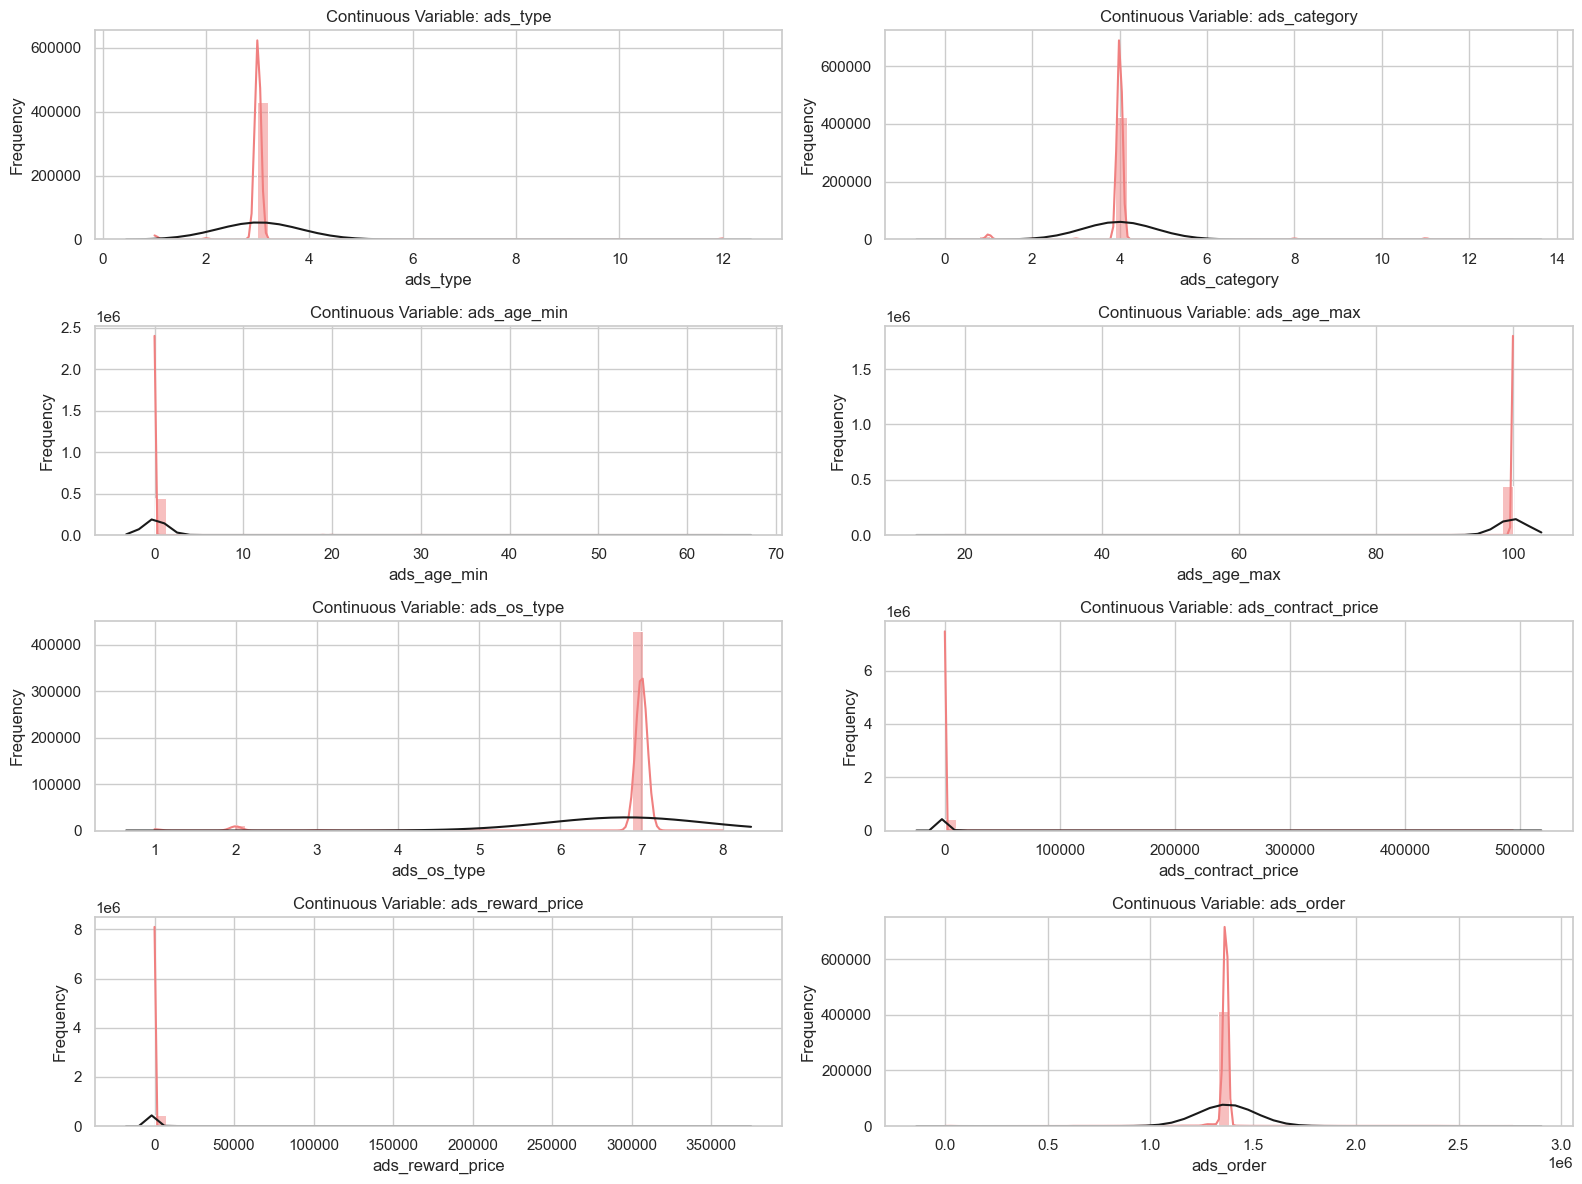

In [60]:
check_distribution(ad_list)

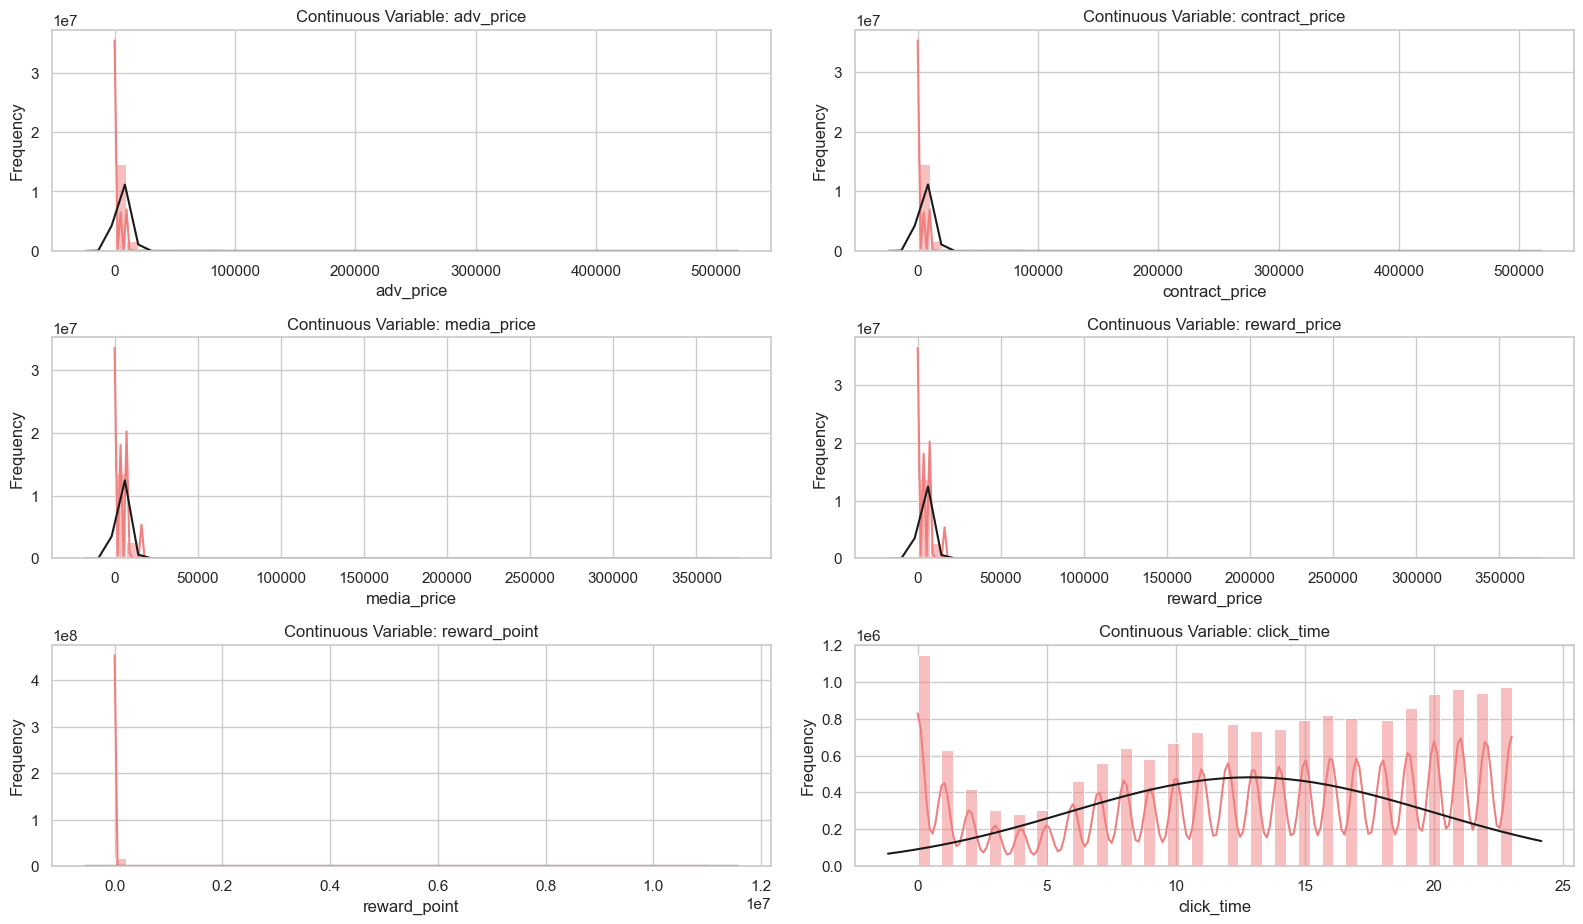

In [48]:
check_distribution(ad_prpt)

In [54]:
pd.set_option('display.float_format', lambda x: f'{x:f}')

In [55]:
num_df = ad_prpt.select_dtypes(exclude='object')
num_df.loc[:, ~(num_df.columns.str.endswith(("id", "idx")))].describe()


,adv_price,contract_price,media_price,reward_price,reward_point,click_time
count,16854865.000000,16854865.000000,16854865.000000,16854865.000000,16854865.000000,16854865.000000
mean,6283.320802,6281.525951,4573.291732,4570.412112,4869.613278,12.892637
std,6096.555848,6096.320462,3882.894610,3885.034346,15804.368484,7.062190
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3600.000000,3600.000000,2700.000000,2700.000000,2700.000000,8.000000
50%,6000.000000,6000.000000,4500.000000,4500.000000,4500.000000,14.000000
75%,6000.000000,6000.000000,4500.000000,4500.000000,4500.000000,19.000000
max,493636.000000,493636.000000,357300.000000,357300.000000,11025000.000000,23.000000


In [62]:
ad_list.isnull().sum() / ad_list.shape[0]

ads_idx              0.000000
ads_code             0.000000
aff_idx              0.000000
adv_idx              0.000000
sch_idx              0.000000
ads_type             0.000000
ads_category         0.000000
ads_name             0.000000
ads_search           0.000004
ads_icon_img         0.000011
ads_summary          0.015858
ads_guide            0.000681
ads_limit            0.998780
ads_payment          0.994756
ads_save_way         0.001154
ads_day_cap          0.000000
ads_sdate            0.000000
ads_edate            0.000000
ads_package          0.974707
ads_sex_type         0.999978
ads_age_min          0.000000
ads_age_max          0.000000
ads_os_type          0.000000
ads_contract_price   0.000000
ads_reward_price     0.000000
ads_order            0.000000
ads_rejoin_type      0.000000
ads_require_adid     0.000000
regdate              0.000000
delyn                0.000000
dtype: float64

In [64]:
ad_list.delyn.nunique()

2

In [ ]:
ad_list[ad_list.delyn == 'Y', ['', 'regdate']]

,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
7,1142,zQ76Efhdj3,9,0,0,3,0,데저트스톰_사전예약(desert_storm_cpa),"데저트스톰_사전예약(desert_storm_cpa),,3281",http://img.shallweadcorp.com/AdImage/Campaign_...,...,0,100,2,650,590,22100,NONE,Y,2017-01-05 11:31:16,Y
14,1180,ngo2OKJYga,0,32,0,1,1,지하철종결자,"지하철종결자,kakao44c6187801b61d99667c6c68852ed5a3://,",https://lh5.ggpht.com/1Wpnz4mt5wYxilWF2njQtc2w...,...,0,100,1,1,1,987900,NONE,Y,2017-01-11 16:47:10,Y
26,1220,YAxjTA2iP5,1,64,0,1,1,메탈크래쉬,"메탈크래쉬,com.chaplingame.metal.kor,",http://imgur.com/is9g8KQ,...,0,100,3,200,150,988900,NONE,Y,2017-01-19 18:34:22,Y
456,2039,28SaZM6shd,6,10,6652,3,0,핀크 가입 이벤트,"핀크 가입 이벤트,com.finnq.f1,adc608c9f297e0a4fd202a7...",https://lh3.googleusercontent.com/KgthZ-ko-J1W...,...,0,100,3,700,595,670700,NONE,Y,2017-12-08 15:06:55,Y
475,2058,yGoECaidUz,1,84,0,1,1,변호사님닷컴,"변호사님닷컴,,",https://i.imgur.com/nQs6SP5.png,...,0,100,1,190,150,1005400,NONE,Y,2017-12-15 13:21:11,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439413,441072,VPtZb3BS8m,57,84,0,3,8,[클릭메이트-단골맺기] 홍선수,"[클릭메이트-단골맺기] 홍선수,af85d514-917f-40d7-bc0d-25ed3...",https://s3.ap-northeast-2.amazonaws.com/com.ga...,...,0,100,7,200,150,2757200,NONE,Y,2025-08-06 14:16:36,Y
440342,442001,E5RRhoL1eT,8,50,0,1,2,초월자 키우기,"초월자 키우기,com.playgames.transcender,75246003",https://static.adbrix.igaworks.com/adpopcorn/2...,...,0,100,2,170,120,2758500,NONE,Y,2025-08-08 16:54:36,Y
442692,444351,dY7jZ77yka,15,1672,1218845,1,2,[원스토어] 조조의 꿈,"[원스토어] 조조의 꿈,com.teamquest.Threekingdoms_GP",https://i.imgur.com/TYzuYah.jpeg,...,0,100,3,180,120,2760700,NONE,Y,2025-08-14 15:33:46,Y
442693,444352,MnWcfxDVbK,15,1672,1218853,2,2,조조의 꿈,조조의 꿈,https://i.imgur.com/TYzuYah.jpeg,...,0,100,1,280,180,2760800,NONE,Y,2025-08-14 15:33:53,Y


In [ ]:
ad_list[ad_list['ads_idx'] == 437715]

,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
436056,437715,y7IrR5YIaQ,1,1615,1205539,12,11,동국헬스케어 힘센 파워코끼리 3000(60포),동국헬스케어 힘센 파워코끼리 3000(60포),https://i.imgur.com/DgGgReN.jpeg,...,0,100,7,493636,320800,1545501,REJOINABLE,N,2025-07-28 13:36:13,N


In [61]:
num_df[num_df['ads_idx'] == 429487]

,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,adv_price,contract_price,media_price,reward_price,reward_point,click_time
18031,429487,0,980,1,252560,252560,10200,10200,2040000,15
19922,429487,0,980,1,252560,252560,10200,10200,1020000,11
35998,429487,0,980,1,252560,252560,10200,10200,1020000,3
52778,429487,0,980,1,252560,252560,10200,10200,1020000,7
69405,429487,0,980,1,252560,252560,10200,10200,2040000,12
...,...,...,...,...,...,...,...,...,...,...
16794209,429487,0,980,1,252560,252560,10200,10200,2040000,15
16795011,429487,0,980,1,252560,252560,10200,10200,1020000,14
16799456,429487,0,980,1,252560,252560,10200,10200,1020000,19
16847802,429487,0,980,1,252560,252560,10200,10200,1020000,6


In [ ]:
ad_list['ads_save_way']

In [58]:
num_df[num_df['contract_price'] == 493636]

,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,adv_price,contract_price,media_price,reward_price,reward_point,click_time
427302,437715,61484804,54,144678214,493636,493636,320800,320800,320800,12
858292,437715,61010824,54,144678813,493636,493636,320800,320800,320800,14
1162825,437715,61784263,54,144678240,493636,493636,320800,320800,320800,0
1245280,437715,61777590,54,144678228,493636,493636,320800,320800,320800,19
2713687,437715,61769667,54,144678219,493636,493636,320800,320800,320800,16
3813016,437715,56785191,54,144681043,493636,493636,320800,320800,320800,21
4132460,437715,53234104,54,144682060,493636,493636,320800,320800,320800,0
4443620,437715,59515108,54,144582477,493636,493636,320800,320800,320800,2
4461308,437715,60910352,54,144632887,493636,493636,320800,320800,320800,23
4860696,437715,61749744,54,144677818,493636,493636,320800,320800,320800,16


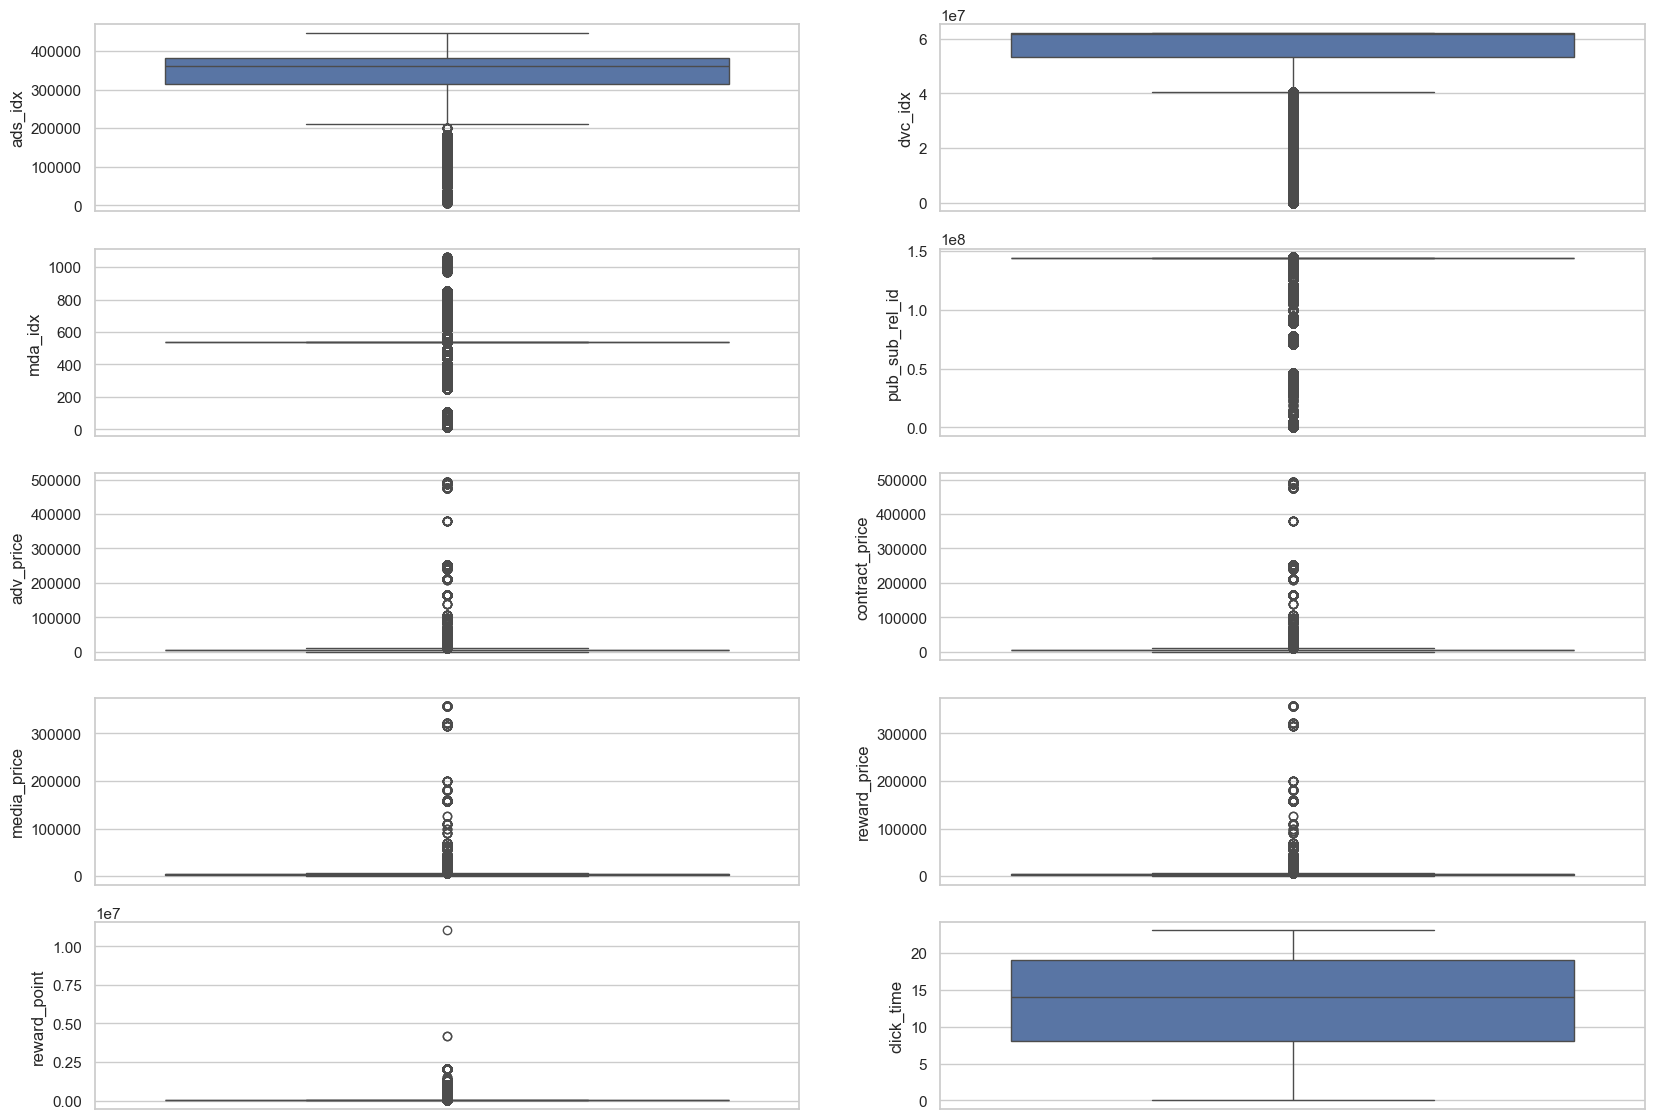

In [51]:
plt.figure(figsize=(20, 17))
continuous_vars = ad_prpt.select_dtypes(exclude='object').columns.to_list()
for i, var in enumerate(continuous_vars):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(ad_prpt[var])

# plt.tight_layout()
    # plt.savefig('image/histogram_sehee_cn.png', dpi=150)
plt.show()

# 시간별 적립 보고서

In [24]:
time_earn = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/수정_시간별적립보고서.csv")
time_earn.head()

,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_acost,rpt_time_earn,weekday,week_type
0,2025-07-27,0,11059,398,5,0,0,0,6,주말
1,2025-07-27,0,13209,583,3,0,0,0,6,주말
2,2025-07-27,0,13928,303,3,3,510,360,6,주말
3,2025-07-27,0,13928,324,3,3,510,360,6,주말
4,2025-07-27,0,13928,340,6,6,1020,720,6,주말


In [25]:
time_earn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279916 entries, 0 to 279915
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   rpt_time_date   279916 non-null  object
 1   rpt_time_time   279916 non-null  int64 
 2   ads_idx         279916 non-null  int64 
 3   mda_idx         279916 non-null  int64 
 4   rpt_time_clk    279916 non-null  int64 
 5   rpt_time_turn   279916 non-null  int64 
 6   rpt_time_acost  279916 non-null  int64 
 7   rpt_time_earn   279916 non-null  int64 
 8   weekday         279916 non-null  int64 
 9   week_type       279916 non-null  object
dtypes: int64(8), object(2)
memory usage: 21.4+ MB


In [141]:
time_earn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279916 entries, 0 to 279915
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   rpt_time_date   279916 non-null  datetime64[ns]
 1   rpt_time_time   279916 non-null  int64         
 2   ads_idx         279916 non-null  int64         
 3   mda_idx         279916 non-null  int64         
 4   rpt_time_clk    279916 non-null  int64         
 5   rpt_time_turn   279916 non-null  int64         
 6   rpt_time_acost  279916 non-null  int64         
 7   rpt_time_earn   279916 non-null  int64         
 8   weekday         279916 non-null  int64         
 9   week_type       279916 non-null  object        
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 21.4+ MB


In [138]:
time_earn.isnull().sum()

rpt_time_date     0
rpt_time_time     0
ads_idx           0
mda_idx           0
rpt_time_clk      0
rpt_time_turn     0
rpt_time_acost    0
rpt_time_earn     0
weekday           0
week_type         0
dtype: int64

In [140]:
time_earn['rpt_time_date'] = pd.to_datetime(time_earn['rpt_time_date'])

In [ ]:
time_earn['weekday'] # 0:월 ~ 6:일

0         6
1         6
2         6
3         6
4         6
         ..
279911    0
279912    0
279913    0
279914    0
279915    0
Name: weekday, Length: 279916, dtype: int64

In [147]:
new_ad_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445260 entries, 0 to 445259
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ads_idx             445260 non-null  int64 
 1   ads_code            445260 non-null  object
 2   aff_idx             445260 non-null  int64 
 3   adv_idx             445260 non-null  int64 
 4   sch_idx             445260 non-null  int64 
 5   ads_type            445260 non-null  int64 
 6   ads_category        445260 non-null  int64 
 7   ads_name            445260 non-null  object
 8   ads_search          445258 non-null  object
 9   ads_icon_img        445255 non-null  object
 10  ads_summary         438199 non-null  object
 11  ads_guide           444957 non-null  object
 12  ads_save_way        444746 non-null  object
 13  ads_day_cap         445260 non-null  object
 14  ads_sdate           445260 non-null  object
 15  ads_edate           445260 non-null  object
 16  ad

In [151]:
time_earn_m = time_earn.merge(new_ad_list, on = 'ads_idx', how = 'left')
time_earn_m

,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_acost,rpt_time_earn,weekday,week_type,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
0,2025-07-27,0,11059,398,5,0,0,0,6,주말,...,0,100,2,300,200,2097400,NONE,Y,2021-05-03 17:23:00,N
1,2025-07-27,0,13209,583,3,0,0,0,6,주말,...,0,100,2,1900,1425,2496600,NONE,Y,2021-10-01 17:29:29,N
2,2025-07-27,0,13928,303,3,3,510,360,6,주말,...,0,100,2,170,120,2758000,NONE,Y,2021-11-12 10:07:45,N
3,2025-07-27,0,13928,324,3,3,510,360,6,주말,...,0,100,2,170,120,2758000,NONE,Y,2021-11-12 10:07:45,N
4,2025-07-27,0,13928,340,6,6,1020,720,6,주말,...,0,100,2,170,120,2758000,NONE,Y,2021-11-12 10:07:45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279911,2025-08-25,11,446855,563,15,2,36,28,0,주중,...,0,100,7,18,12,1369916,ADS_CODE_DAILY_UPDATE,Y,2025-08-25 00:14:50,N
279912,2025-08-25,11,446902,270,1,0,0,0,0,주중,...,0,100,7,200,150,2735900,NONE,Y,2025-08-25 10:06:15,N
279913,2025-08-25,11,446909,562,3,2,36,28,0,주중,...,0,100,7,18,12,1369925,ADS_CODE_DAILY_UPDATE,Y,2025-08-25 10:42:19,N
279914,2025-08-25,11,446909,563,51,7,126,98,0,주중,...,0,100,7,18,12,1369925,ADS_CODE_DAILY_UPDATE,Y,2025-08-25 10:42:19,N


In [155]:
time_earn_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279916 entries, 0 to 279915
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rpt_time_date       279916 non-null  datetime64[ns]
 1   rpt_time_time       279916 non-null  int64         
 2   ads_idx             279916 non-null  int64         
 3   mda_idx             279916 non-null  int64         
 4   rpt_time_clk        279916 non-null  int64         
 5   rpt_time_turn       279916 non-null  int64         
 6   rpt_time_acost      279916 non-null  int64         
 7   rpt_time_earn       279916 non-null  int64         
 8   weekday             279916 non-null  int64         
 9   week_type           279916 non-null  object        
 10  ads_code            279916 non-null  object        
 11  aff_idx             279916 non-null  int64         
 12  adv_idx             279916 non-null  int64         
 13  sch_idx             279916 no

In [152]:
time_earn_m.isna().sum()

rpt_time_date          0
rpt_time_time          0
ads_idx                0
mda_idx                0
rpt_time_clk           0
rpt_time_turn          0
rpt_time_acost         0
rpt_time_earn          0
weekday                0
week_type              0
ads_code               0
aff_idx                0
adv_idx                0
sch_idx                0
ads_type               0
ads_category           0
ads_name               0
ads_search             0
ads_icon_img           0
ads_summary           94
ads_guide              2
ads_save_way           0
ads_day_cap            0
ads_sdate              0
ads_edate              0
ads_age_min            0
ads_age_max            0
ads_os_type            0
ads_contract_price     0
ads_reward_price       0
ads_order              0
ads_rejoin_type        0
ads_require_adid       0
regdate                0
delyn                  0
dtype: int64

In [164]:
import platform
import matplotlib.pyplot as plt

In [165]:
# 운영체제 확인
system_name = platform.system()

# OS별 폰트 설정
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우용
elif system_name == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    plt.rc('font', family='NanumGothic')  # 설치 필요할 수도 있음
else:
    print(f"Unknown OS: {system_name}. Set font manually if needed.")


# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [178]:
time_earn_m['rpt_time_cost_diff'] = time_earn_m['rpt_time_acost'] - time_earn_m['rpt_time_earn']

In [180]:
time_earn_m['ads_category'] = time_earn_m['ads_category'].astype('string')

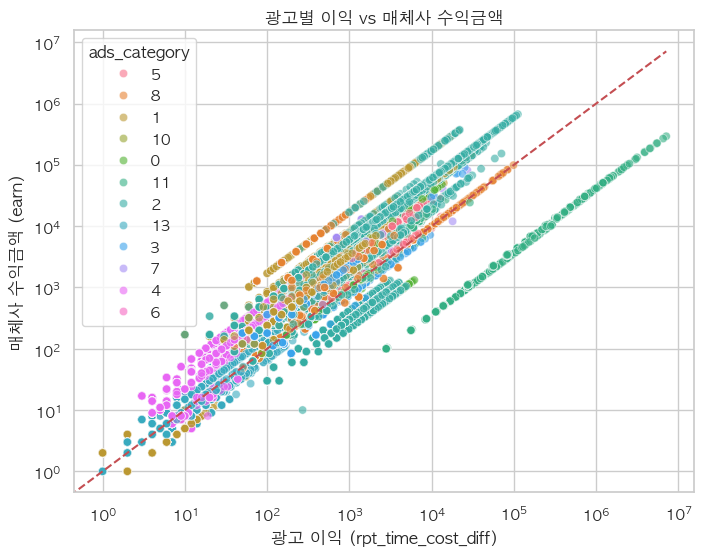

In [190]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=time_earn_m['rpt_time_cost_diff'],
                y=time_earn_m['rpt_time_earn'],
                hue=time_earn_m['ads_category'],
                alpha=0.6)

# 손익분기선 추가
max_val = max(time_earn_m['rpt_time_cost_diff'].max(), time_earn_m['rpt_time_earn'].max())
plt.plot([0, max_val], [0, max_val], 'r--')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("광고 이익 (rpt_time_cost_diff)")
plt.ylabel("매체사 수익금액 (earn)")
plt.title("광고별 이익 vs 매체사 수익금액")
plt.show()

In [168]:
time_earn_m['rpt_time_clk'].describe()

count   279916.000000
mean        59.938571
std       1046.172540
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max      32620.000000
Name: rpt_time_clk, dtype: float64

In [ ]:
time_earn_m['cvr'] =  time_earn_m['rpt_time_turn']/time_earn_m['rpt_time_clk']

In [200]:
gr_ct = time_earn_m.groupby('ads_category')[['rpt_time_turn', 'rpt_time_clk']].sum().reset_index()
gr_ct['total_ctr'] = gr_ct['rpt_time_turn']/gr_ct['rpt_time_clk']
gr_ct = gr_ct.sort_values('total_ctr', ascending=False)
gr_ct

,ads_category,rpt_time_turn,rpt_time_clk,total_ctr
4,13,23144,29814,0.776280
7,4,253351,438305,0.578024
0,0,68030,126741,0.536764
6,3,41385,106109,0.390023
5,2,863084,2606106,0.331178
1,1,164478,559025,0.294223
3,11,5579,20407,0.273387
9,6,3838,16475,0.232959
11,8,16440,209652,0.078416
10,7,265,14895,0.017791


<Axes: xlabel='ads_category', ylabel='total_ctr'>

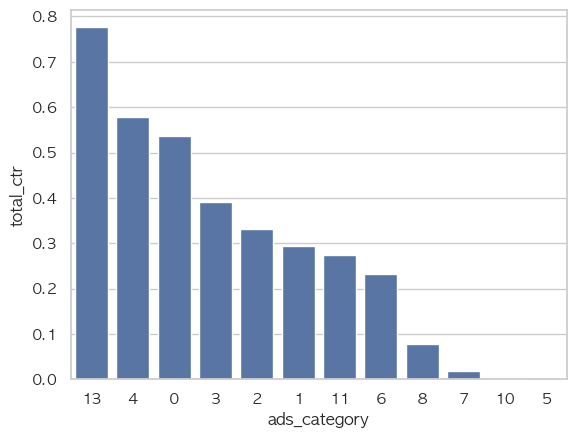

In [202]:
sns.barplot(x=gr_ct['ads_category'],
                y=gr_ct['total_ctr'])

In [196]:
time_earn_m.groupby('ads_category')['cvr'].median()

ads_category
0    0.866667
1    0.000000
10   0.000000
11   0.000000
13   1.000000
2    0.770886
3    0.400000
4    0.666667
5    0.000000
6    0.000000
7    0.000000
8    0.000000
Name: cvr, dtype: float64

In [ ]:
gr_ct = time_earn_m.groupby('ads_category')
sns.barplot(x=time_earn_m['rpt_time_date'],
                y=time_earn_m['rpt_time_earn'],
                alpha=0.6)

In [172]:
time_earn_m['cvr'].isnull().sum()

np.int64(0)

In [169]:
time_earn_m[time_earn_m['rpt_time_clk'] <= 10].shape[0]

230379

In [154]:
import pygwalker as pyg
gwalker = pyg.walk(time_earn_m)

Box(children=(HTML(value='\n<div id="ifr-pyg-00063db90c9973aapS03nmf651INFjzJ" style="height: auto">\n    <hea…

# 매체사 클러스터링

In [ ]:
part_earn = pd.read_csv('/Users/t2023-m0052/Documents/GitHub/final_project/data/참여적립조인.csv')
part_earn.head() 

,Unnamed: 0,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
part_earn

Index(['Unnamed: 0', 'click_key', 'ads_idx', 'dvc_idx', 'mda_idx',
       'pub_sub_rel_id', 'contract_price', 'media_price', 'click_day',
       'click_time', 'click_date', 'exp_day', 'network', 'user_ip', 'rwd_idx',
       'ads_code', 'advid', 'adv_cost', 'earn_cost', 'regdate', 'ctit',
       'conversion'],
      dtype='object')

In [26]:
domain = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/광고도메인리스트.csv")
domain.head()

,Unnamed: 0,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,0,6508,3u4lOKJAek,13,335,3,10,스마트피싱보호,https://seimg.pincrux.com/icon/1551770735.png,"[상품소개]\n알면 피하고, 모르면 당하는 보이스피싱\n나와 소중한 가족을 안전하게...",...,9999-12-31 00:00:00,0,100,7,1400,1100,2381500,NONE,2020-04-23 17:53:01 UTC,금융
1,1,6985,SijDrtH4GV,13,335,3,7,DB손해보험 다이렉트,https://seimg.pincrux.com/icon/1575337232.jpg,[참여방법]\n- 빠르고 간편한 DB손해보험 다이렉트에서\n- 내 차 보험료를 지금...,...,9999-06-06 00:00:00,0,100,7,2700,2300,1201938,NONE,2020-06-30 15:22:59 UTC,금융
2,2,8327,k1RZftVHoW,13,335,3,10,파일썬,https://static.i-screen.kr/img/ad/icon/aff_13_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,9999-12-31 23:59:00,0,100,7,3200,2420,1673458,NONE,2020-11-10 11:21:43 UTC,미디어/컨텐츠
3,3,9264,EGZcaVOtlc,23,220,3,10,하나 가득담은 운전자보험가입,https://i.imgur.com/kaWiYyT.png,하나손해보험 다이렉트 운전자보험 가입시\n\n01.참여방법\n1) 계산하기 페이지를...,...,9999-12-31 23:59:59,0,100,7,11000,8250,2372800,NONE,2020-11-30 15:16:45 UTC,금융
4,4,9716,NwZZq45Kgb,6,10,3,8,베이비러브 참여 신청,https://nextapps-nas.aws.appang.kr/icon/SDl2uC...,[참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...,...,2029-11-29 00:00:00,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,생활


In [27]:
domain.columns

Index(['Unnamed: 0', 'ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_icon_img', 'ads_summary',
       'ads_save_way', 'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min',
       'ads_age_max', 'ads_os_type', 'ads_contract_price', 'ads_reward_price',
       'ads_order', 'ads_rejoin_type', 'regdate', 'domain'],
      dtype='object')

In [30]:
cl_domain = domain.drop(['Unnamed: 0','ads_icon_img', 'ads_summary', 'ads_sdate', 
                         'ads_age_min', 'ads_age_max', 'regdate', 'ads_contract_price', 'ads_reward_price'], axis = 1)

In [31]:
cl_domain.columns

Index(['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category',
       'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_edate', 'ads_os_type',
       'ads_order', 'ads_rejoin_type', 'domain'],
      dtype='object')

In [32]:
part_earn.columns

Index(['Unnamed: 0', 'click_key', 'ads_idx', 'dvc_idx', 'mda_idx',
       'pub_sub_rel_id', 'contract_price', 'media_price', 'click_day',
       'click_time', 'click_date', 'exp_day', 'network', 'user_ip', 'rwd_idx',
       'ads_code', 'advid', 'adv_cost', 'earn_cost', 'regdate', 'ctit',
       'conversion'],
      dtype='object')

In [ ]:
cl_part_earn = part_earn.drop(['Unnamed: 0', 'click_key', 'click_day', 'dvc_idx', 'user_ip'], axis=1)

In [35]:
cl_part_earn.columns

Index(['ads_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price', 'media_price',
       'click_day', 'click_time', 'click_date', 'exp_day', 'network',
       'rwd_idx', 'ads_code', 'advid', 'adv_cost', 'earn_cost', 'regdate',
       'ctit', 'conversion'],
      dtype='object')

In [72]:
cl_part_earn.isnull().sum()

ads_idx                  0
mda_idx                  0
pub_sub_rel_id           0
contract_price           0
media_price              0
click_day                0
click_time               0
click_date               0
exp_day                  0
network            2501362
rwd_idx           15379915
ads_code          15379915
advid             15387086
adv_cost          15379915
earn_cost         15379915
regdate           15379915
ctit              15379915
conversion               0
dtype: int64

In [37]:
cl_domain.columns

Index(['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category',
       'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_edate', 'ads_os_type',
       'ads_order', 'ads_rejoin_type', 'domain'],
      dtype='object')

In [73]:
machesa = cl_part_earn.merge(cl_domain, on = ['ads_idx'], how='left')

In [74]:
machesa.columns

Index(['ads_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price', 'media_price',
       'click_day', 'click_time', 'click_date', 'exp_day', 'network',
       'rwd_idx', 'ads_code_x', 'advid', 'adv_cost', 'earn_cost', 'regdate',
       'ctit', 'conversion', 'ads_code_y', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_edate',
       'ads_os_type', 'ads_order', 'ads_rejoin_type', 'domain'],
      dtype='object')

In [76]:
machesa.isnull().sum() / machesa.shape[0]

ads_idx            0.000000
mda_idx            0.000000
pub_sub_rel_id     0.000000
contract_price     0.000000
media_price        0.000000
click_day          0.000000
click_time         0.000000
click_date         0.000000
exp_day            0.000000
network            0.148406
rwd_idx            0.912491
ads_code_x         0.912491
advid              0.912917
adv_cost           0.912491
earn_cost          0.912491
regdate            0.912491
ctit               0.912491
conversion         0.000000
ads_code_y         0.000000
aff_idx            0.000000
adv_idx            0.000000
ads_type           0.000000
ads_category       0.000000
ads_name           0.000000
ads_save_way       0.000000
ads_day_cap        0.000000
ads_edate          0.000000
ads_os_type        0.000000
ads_order          0.000000
ads_rejoin_type    0.000000
domain             0.000000
dtype: float64

In [77]:
machesa.drop(['ads_code_x'], axis = 1, inplace=True)

In [83]:
machesa.columns

Index(['ads_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price', 'media_price',
       'click_day', 'click_time', 'click_date', 'exp_day', 'network',
       'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'regdate', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_edate',
       'ads_os_type', 'ads_order', 'ads_rejoin_type', 'domain'],
      dtype='object')

In [82]:
machesa.rename(columns={"ads_code_y":"ads_code"}, inplace=True)

In [84]:
machesa[['mda_idx', 'contract_price', 'media_price', 'adv_cost', 'earn_cost']]

,mda_idx,contract_price,media_price,adv_cost,earn_cost
0,539,6000,4500,NaN,NaN
1,58,180,170,180.0,170.0
2,808,170,120,170.0,120.0
3,539,6000,4500,NaN,NaN
4,539,15600,11700,NaN,NaN
...,...,...,...,...,...
16854860,539,5400,3800,NaN,NaN
16854861,539,3600,2700,NaN,NaN
16854862,58,180,170,NaN,NaN
16854863,539,6000,4500,NaN,NaN


In [85]:
machesa[['mda_idx', 'contract_price', 'media_price', 'adv_cost', 'earn_cost']].groupby('mda_idx').agg(['mean', 'median', 'sum', 'max', 'min'])

contract_price                                            media_price  \
                  mean    median           sum     max     min           mean   
mda_idx                                                                         
12          267.335255     180.0      62138872    2000     130     211.075513   
14         1920.342390     230.0     162773982   30000     170    1408.739662   
18        12072.960242    7800.0      71966916   33600    1200    8736.873008   
22          333.194745     190.0      27773448   33600     150     238.063727   
26         2366.755162     280.0       1604660   20400     190    1716.622419   
30          313.998256     230.0       1620231    4800     230     240.240310   
32         3452.198221    2000.0       5433760    7200    1200    2441.613723   
54         7262.389157     230.0      93234552  493636       2    5075.786026   
56         2563.900366     280.0     102881630   24000     180    2053.759190   
58         2940.811443     280.0    1419806120   24000     180    2345.768247   
73        24468.400000    5726.5        734052  493636      50   15884.500000   
87          181.799158     180.0      11698594    4500     180     151.244930   
108        1017.226322     130.0        827005   24000     130     626.586716   
246         417.049457     200.0        691468   21600       2     297.461399   
270         974.153189       5.0      60195848  240000       0     613.665496   
281        3207.305825    1200.0       4624935   30000     200    2351.115811   
290         331.675000     180.0         26534    3500      10     236.462500   
291          26.434211      18.0          2009     230       2      17.486842   
294        1080.284277     260.0       4081314   24000     210     768.689783   
303         201.340284     170.0       2394540     260     130     108.947280   
324         200.666097     170.0       2349800     260     130     105.926985   
337       10594.555208    2300.0      20341546  476400     170    7455.765625   
340         203.006653     170.0       2715620     260     130     108.621141   
341         206.283000     170.0       2844230     260     130     113.150928   
342         289.343859     280.0      88627760    1500     180     249.624526   
343         397.268865     280.0      72227055   20909     280     330.724222   
344         525.923949     280.0      32474752   20909     280     407.339833   
356        1443.689422    1440.0       2770440    7200     190     988.754560   
371         288.514473      16.0       8741123   33600       2     210.234050   
374           9.000000       9.0            18      16       2       6.500000   
375        1300.198614     230.0        562986   30000       2     931.556582   
384         806.747251     180.0      16285000    2000     180     513.085307   
385         691.740018     250.0       3049190    1500     190     486.238657   
389          10.356725       5.0          8855    1360       2       8.014035   
396         304.878826     280.0      47867500    1620     280     262.279545   
397         346.559644     280.0       8419320    1620     280     298.552729   
398         831.807055     280.0       5776900   30000     180     513.467243   
401        3064.189911     300.0       1032632   30000     230    1944.020772   
409         133.600000     190.0          1336     240       2     104.300000   
437        1350.000000    1350.0          1350    1350    1350    1275.000000   
442        2096.834320     230.0        354365  106363      15    1384.130178   
458         292.880740     280.0        886550    1600     230     153.987446   
480        1972.393939    1280.0        195267   12000       2    1474.000000   
481        2337.857143     500.0         65460   13600      15    1657.178571   
482         533.138797     230.0       1932095   33600       2     397.155629   
492          34.716707      15.0         28676    7200      10      24.797821   
496         271.479711     230.0      3

### 2. 도메인 분포 만들기

In [86]:
domain_dummies = pd.get_dummies(machesa['domain'], prefix = "domain")
df_domain = pd.concat([machesa[['mda_idx']], domain_dummies], axis=1)
domain_features = df_domain.groupby('mda_idx').sum()
domain_features.isna().sum()

domain_게임         0
domain_교육         0
domain_금융         0
domain_기타         0
domain_미디어/컨텐츠    0
domain_뷰티         0
domain_비영리/공공     0
domain_생활         0
domain_식당/카페      0
domain_식음료        0
domain_운동/스포츠     0
domain_운세         0
domain_의료/건강      0
domain_채용         0
domain_커머스        0
dtype: int64

In [87]:
domain_features

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,187866,0,3971,0,53,0,7300,1479,0,643,0,0,131,0,30995
14,38866,0,3560,57,15755,5941,0,6248,0,6437,0,0,4810,888,2201
18,3315,0,914,0,1070,0,0,617,0,0,0,0,0,0,45
22,37240,16,11756,0,15966,530,4813,2867,29,1138,367,40,2462,3156,2975
26,423,0,41,0,20,0,0,115,0,0,0,0,0,0,79
30,191,1,703,0,246,265,4,14,0,13,0,3,6,3687,27
32,0,0,455,0,309,0,0,81,0,0,0,0,635,0,94
54,1598,38,1830,0,386,153,737,660,9,203,16,4589,238,787,1594
56,22655,0,5932,0,418,0,0,1413,0,0,0,1481,5807,0,2421


In [89]:
domain_features.shape

(189, 15)

In [66]:
domain.head()

,Unnamed: 0,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,0,6508,3u4lOKJAek,13,335,3,10,스마트피싱보호,https://seimg.pincrux.com/icon/1551770735.png,"[상품소개]\n알면 피하고, 모르면 당하는 보이스피싱\n나와 소중한 가족을 안전하게...",...,9999-12-31 00:00:00,0,100,7,1400,1100,2381500,NONE,2020-04-23 17:53:01 UTC,금융
1,1,6985,SijDrtH4GV,13,335,3,7,DB손해보험 다이렉트,https://seimg.pincrux.com/icon/1575337232.jpg,[참여방법]\n- 빠르고 간편한 DB손해보험 다이렉트에서\n- 내 차 보험료를 지금...,...,9999-06-06 00:00:00,0,100,7,2700,2300,1201938,NONE,2020-06-30 15:22:59 UTC,금융
2,2,8327,k1RZftVHoW,13,335,3,10,파일썬,https://static.i-screen.kr/img/ad/icon/aff_13_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,9999-12-31 23:59:00,0,100,7,3200,2420,1673458,NONE,2020-11-10 11:21:43 UTC,미디어/컨텐츠
3,3,9264,EGZcaVOtlc,23,220,3,10,하나 가득담은 운전자보험가입,https://i.imgur.com/kaWiYyT.png,하나손해보험 다이렉트 운전자보험 가입시\n\n01.참여방법\n1) 계산하기 페이지를...,...,9999-12-31 23:59:59,0,100,7,11000,8250,2372800,NONE,2020-11-30 15:16:45 UTC,금융
4,4,9716,NwZZq45Kgb,6,10,3,8,베이비러브 참여 신청,https://nextapps-nas.aws.appang.kr/icon/SDl2uC...,[참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...,...,2029-11-29 00:00:00,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,생활


In [70]:
## 확인 - 실제로 광고가 없는지
why_notin = [374, 710, 752, 755, 759, 766, 769, 774, 847, 1000, 1023, 1041, 1042, 1049, 1051, 1055, 1059, 1061]
notin_ads =  machesa.loc[machesa['mda_idx'].isin(why_notin), 'ads_idx'].unique()
print("고유값", notin_ads, "개수", len(notin_ads))
domain[domain['ads_idx'].isin(notin_ads)]


고유값 [243651  14074 436820 385454  13988  28781 133653 438955  72968 426584
 356956 264408  11059 173521   9982 168800 429011 438436  19488 364106
 438719 442776 439982 441181 435861 438226 371469 363720 363736  73878
 438972 441013 445023 385444 357653 438970 439137  31140 199677 168803
 435357 163183 117472 438927 426812  72969  20257 158724 363738  25850
  16529 441904 355220 438971 435910  27572 439985] 개수 57


,Unnamed: 0,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
6,6,9982,ChpB9DGeNo,8,50,11,3,강원일보 네이버 뉴스,https://static.adbrix.igaworks.com/adpopcorn/2...,[참여방법]\n1.\'참여하기\' 버튼 터치하고 이벤트페이지로 이동\n2. 이벤트 ...,...,2030-01-01 00:00:00,0,100,7,230,160,2729900,NONE,2021-02-05 14:56:37 UTC,미디어/컨텐츠
24,24,11059,2vK6pADbON,8,50,3,5,파이널삼국지2,https://static.adbrix.igaworks.com/adpopcorn/2...,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. APP 최초 내...,...,2027-01-01 00:00:00,0,100,2,300,200,2097400,NONE,2021-05-03 17:23:00 UTC,게임
32,32,13988,nTVtBN47OC,1,404,3,7,주식투자 정보서비스,https://i.imgur.com/N6KVHsQ.jpg,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,2030-01-01 00:00:00,0,100,7,6000,4500,1554607,NONE,2021-11-16 13:53:11 UTC,금융
34,34,14074,pA0PyJkkmv,1,998,3,8,오토링 광고 1회 참여,https://play-lh.googleusercontent.com/m5RNTCvq...,돈벌기 가장 쉬운 리워드어플 오토링입니다.\n적립이 매우 간단한 광고 \n천개이상 ...,...,2030-01-01 00:00:00,0,100,2,500,300,2642800,NONE,2021-11-19 15:40:45 UTC,금융
46,46,16529,Xbe2NCUyZ6,1,404,3,10,MyOTP,http://api.flexplatform.net/v1/get_ad_image.ph...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,2027-01-01 00:00:00,0,100,7,1530,1000,2494900,NONE,2022-04-14 14:27:59 UTC,금융
64,64,19488,tBwR3QXYKy,8,50,11,3,광주방송 네이버 뉴스,https://i.imgur.com/73IZoOo.jpg,광주방송 네이버 뉴스 \'구독\'하면 리워드 지급\n* 7일 이내 \'구독\' 취소...,...,2030-01-01 00:00:00,0,100,2,230,160,2729100,NONE,2022-09-23 11:55:06 UTC,미디어/컨텐츠
72,72,20257,tjAoSt2zk7,1,1217,3,10,해외주식정보,https://i.ibb.co/fd5PVt7/image.png,참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 서비스 가...,...,2034-01-01 00:00:00,0,100,7,4000,2800,2592100,NONE,2022-11-08 18:51:22 UTC,금융
146,146,25850,u7ixSCx3K0,13,335,3,8,똑똑보카 룰렛이벤트!,https://seimg.pincrux.com/icon/1697000184.png,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 3초 퀴...,...,2029-11-29 00:00:00,0,100,2,100,70,2486800,NONE,2023-10-17 11:22:19 UTC,교육
158,158,27572,955oLvqtif,23,220,3,7,신한 SOL페이 퀴즈팡팡 퀴즈 풀면,https://i.imgur.com/D6tOnD7.png,퀴즈팡팡 OX퀴즈 (최근 1년 이상 신한 SOL페이(구 신한pLay)에 방문한 적이...,...,2029-11-28 00:00:00,0,100,7,600,450,2289200,NONE,2023-12-21 15:38:56 UTC,금융
192,192,28781,EdNKMDeUBj,1,1460,3,10,로보주식플러스,https://i.ibb.co/mFbMfcr/1-140x140.png,1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 페이지 이동\n3...,...,2031-01-01 00:00:00,0,100,7,12000,10000,2682900,NONE,2024-02-20 10:39:15 UTC,금융


In [88]:
# 비율로 정규화
domain_features = domain_features.div(domain_features.sum(axis=1), axis=0)
domain_features

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,0.808241,0.000000,0.017084,0.000000,0.000228,0.000000,0.031406,0.006363,0.000000,0.002766,0.000000,0.000000e+00,0.000564,0.000000e+00,0.133347
14,0.458526,0.000000,0.041999,0.000672,0.185871,0.070090,0.000000,0.073711,0.000000,0.075941,0.000000,0.000000e+00,0.056746,1.047627e-02,0.025967
18,0.556115,0.000000,0.153330,0.000000,0.179500,0.000000,0.000000,0.103506,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.007549
22,0.446764,0.000192,0.141035,0.000000,0.191542,0.006358,0.057741,0.034395,0.000348,0.013652,0.004403,4.798752e-04,0.029536,3.786216e-02,0.035691
26,0.623894,0.000000,0.060472,0.000000,0.029499,0.000000,0.000000,0.169617,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.116519
30,0.037016,0.000194,0.136240,0.000000,0.047674,0.051357,0.000775,0.002713,0.000000,0.002519,0.000000,5.813953e-04,0.001163,7.145349e-01,0.005233
32,0.000000,0.000000,0.289072,0.000000,0.196315,0.000000,0.000000,0.051461,0.000000,0.000000,0.000000,0.000000e+00,0.403431,0.000000e+00,0.059720
54,0.124474,0.002960,0.142546,0.000000,0.030067,0.011918,0.057408,0.051410,0.000701,0.015812,0.001246,3.574544e-01,0.018539,6.130238e-02,0.124163
56,0.564582,0.000000,0.147831,0.000000,0.010417,0.000000,0.000000,0.035213,0.000000,0.000000,0.000000,3.690782e-02,0.144716,0.000000e+00,0.060333


### 3. 광고유형 분포

In [91]:

type_dummies = pd.get_dummies(machesa['ads_type'], prefix='type')
df_type = pd.concat([machesa['mda_idx'], type_dummies], axis = 1)
type_features = df_type.groupby('mda_idx').sum()
type_features = type_features.div(type_features.sum(axis = 1), axis = 0)
type_features

,type_1,type_2,type_3,type_4,type_5,type_7,type_9,type_10,type_11,type_12
mda_idx,,,,,,,,,,
12,0.789712,0.099510,0.110752,0.000000,0.000026,0.000000,0.000000,0.000000,0.000000,0.000000
14,0.366280,0.106155,0.308106,0.000000,0.044949,0.040230,0.000000,0.134280,0.000000,0.000000
18,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22,0.493720,0.180409,0.288345,0.000000,0.002447,0.035079,0.000000,0.000000,0.000000,0.000000
26,0.126844,0.420354,0.452802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30,0.000000,0.847093,0.062209,0.000000,0.000000,0.051357,0.000000,0.038760,0.000581,0.000000
32,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
54,0.075869,0.169107,0.712650,0.000000,0.000779,0.000156,0.000000,0.000000,0.000000,0.041439
56,0.056221,0.502554,0.441224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 4. 광고 카테고리 분포

In [92]:
category_dummies = pd.get_dummies(machesa['ads_category'], prefix='category')
df_category = pd.concat([machesa['mda_idx'], category_dummies], axis = 1)
category_features = df_category.groupby('mda_idx').sum()
category_features = category_features.div(category_features.sum(axis = 1), axis = 0)
category_features

,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
mda_idx,,,,,,,,,,,,
12,0.055038,0.263231,0.570952,0.014748,0.000000,0.000000,0.000000,0.000000,0.096030,0.000000,0.000000,0.000000
14,0.000000,0.202447,0.269988,0.250451,0.000000,0.123002,0.000000,0.000283,0.150455,0.003374,0.000000,0.000000
18,0.000000,0.000000,0.000000,0.000000,0.000000,0.660795,0.000000,0.000000,0.334843,0.004362,0.000000,0.000000
22,0.154484,0.066331,0.453338,0.092532,0.000000,0.002675,0.000000,0.003371,0.222482,0.004787,0.000000,0.000000
26,0.000000,0.000000,0.547198,0.000000,0.000000,0.234513,0.000000,0.000000,0.206490,0.011799,0.000000,0.000000
30,0.000000,0.133915,0.713178,0.092442,0.000000,0.036628,0.000000,0.001163,0.013566,0.009109,0.000000,0.000000
32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.289072,0.653748,0.057179,0.000000,0.000000
54,0.069481,0.064340,0.116996,0.067300,0.001792,0.033728,0.000000,0.033728,0.074700,0.144415,0.041439,0.352080
56,0.000000,0.056221,0.502554,0.000000,0.000000,0.013607,0.000000,0.014255,0.125078,0.288285,0.000000,0.000000


### 5. 규모 정보 (합계 / 평균)

In [95]:
scale_features = machesa.groupby('mda_idx').agg({
    'contract_price':['mean', 'median', 'sum', 'max', 'min'],
    'media_price':['mean', 'median', 'sum', 'max', 'min'],
    'adv_cost': ['mean', 'median', 'sum', 'max', 'min'],
    'earn_cost':['mean', 'median', 'sum', 'max', 'min'],
    'ads_type':'count'
    })
scale_features

contract_price                                            media_price  \
                  mean    median           sum     max     min           mean   
mda_idx                                                                         
12          267.335255     180.0      62138872    2000     130     211.075513   
14         1920.342390     230.0     162773982   30000     170    1408.739662   
18        12072.960242    7800.0      71966916   33600    1200    8736.873008   
22          333.194745     190.0      27773448   33600     150     238.063727   
26         2366.755162     280.0       1604660   20400     190    1716.622419   
30          313.998256     230.0       1620231    4800     230     240.240310   
32         3452.198221    2000.0       5433760    7200    1200    2441.613723   
54         7262.389157     230.0      93234552  493636       2    5075.786026   
56         2563.900366     280.0     102881630   24000     180    2053.759190   
58         2940.811443     280.0    1419806120   24000     180    2345.768247   
73        24468.400000    5726.5        734052  493636      50   15884.500000   
87          181.799158     180.0      11698594    4500     180     151.244930   
108        1017.226322     130.0        827005   24000     130     626.586716   
246         417.049457     200.0        691468   21600       2     297.461399   
270         974.153189       5.0      60195848  240000       0     613.665496   
281        3207.305825    1200.0       4624935   30000     200    2351.115811   
290         331.675000     180.0         26534    3500      10     236.462500   
291          26.434211      18.0          2009     230       2      17.486842   
294        1080.284277     260.0       4081314   24000     210     768.689783   
303         201.340284     170.0       2394540     260     130     108.947280   
324         200.666097     170.0       2349800     260     130     105.926985   
337       10594.555208    2300.0      20341546  476400     170    7455.765625   
340         203.006653     170.0       2715620     260     130     108.621141   
341         206.283000     170.0       2844230     260     130     113.150928   
342         289.343859     280.0      88627760    1500     180     249.624526   
343         397.268865     280.0      72227055   20909     280     330.724222   
344         525.923949     280.0      32474752   20909     280     407.339833   
356        1443.689422    1440.0       2770440    7200     190     988.754560   
371         288.514473      16.0       8741123   33600       2     210.234050   
374           9.000000       9.0            18      16       2       6.500000   
375        1300.198614     230.0        562986   30000       2     931.556582   
384         806.747251     180.0      16285000    2000     180     513.085307   
385         691.740018     250.0       3049190    1500     190     486.238657   
389          10.356725       5.0          8855    1360       2       8.014035   
396         304.878826     280.0      47867500    1620     280     262.279545   
397         346.559644     280.0       8419320    1620     280     298.552729   
398         831.807055     280.0       5776900   30000     180     513.467243   
401        3064.189911     300.0       1032632   30000     230    1944.020772   
409         133.600000     190.0          1336     240       2     104.300000   
437        1350.000000    1350.0          1350    1350    1350    1275.000000   
442        2096.834320     230.0        354365  106363      15    1384.130178   
458         292.880740     280.0        886550    1600     230     153.987446   
480        1972.393939    1280.0        195267   12000       2    1474.000000   
481        2337.857143     500.0         65460   13600      15    1657.178571   
482         533.138797     230.0       1932095   33600       2     397.155629   
492          34.716707      15.0         28676    7200      10      24.797821   
496         271.479711     230.0      3

## 클러스터링